# Analysis of results for different parameters

## Metrics:
all metrics are calculated for each vType and averaged over many reps.
trip duration: average duration of all trips
depart delay: average delay of all trips
speed: average speed of all trips
timeLoss: average time loss of all trips in comparison to maximum possible speed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
POLICY_NAMES = ["ClearFront", "Nothing"]
FLOWS = [1000,2000,3000,4000,5000]
METRICS = ["duration","speed", "departDelay", "timeLoss", "totalDelay"]
vTypes = ["emergency", "HD","AV", "all"]

fontsize = 20

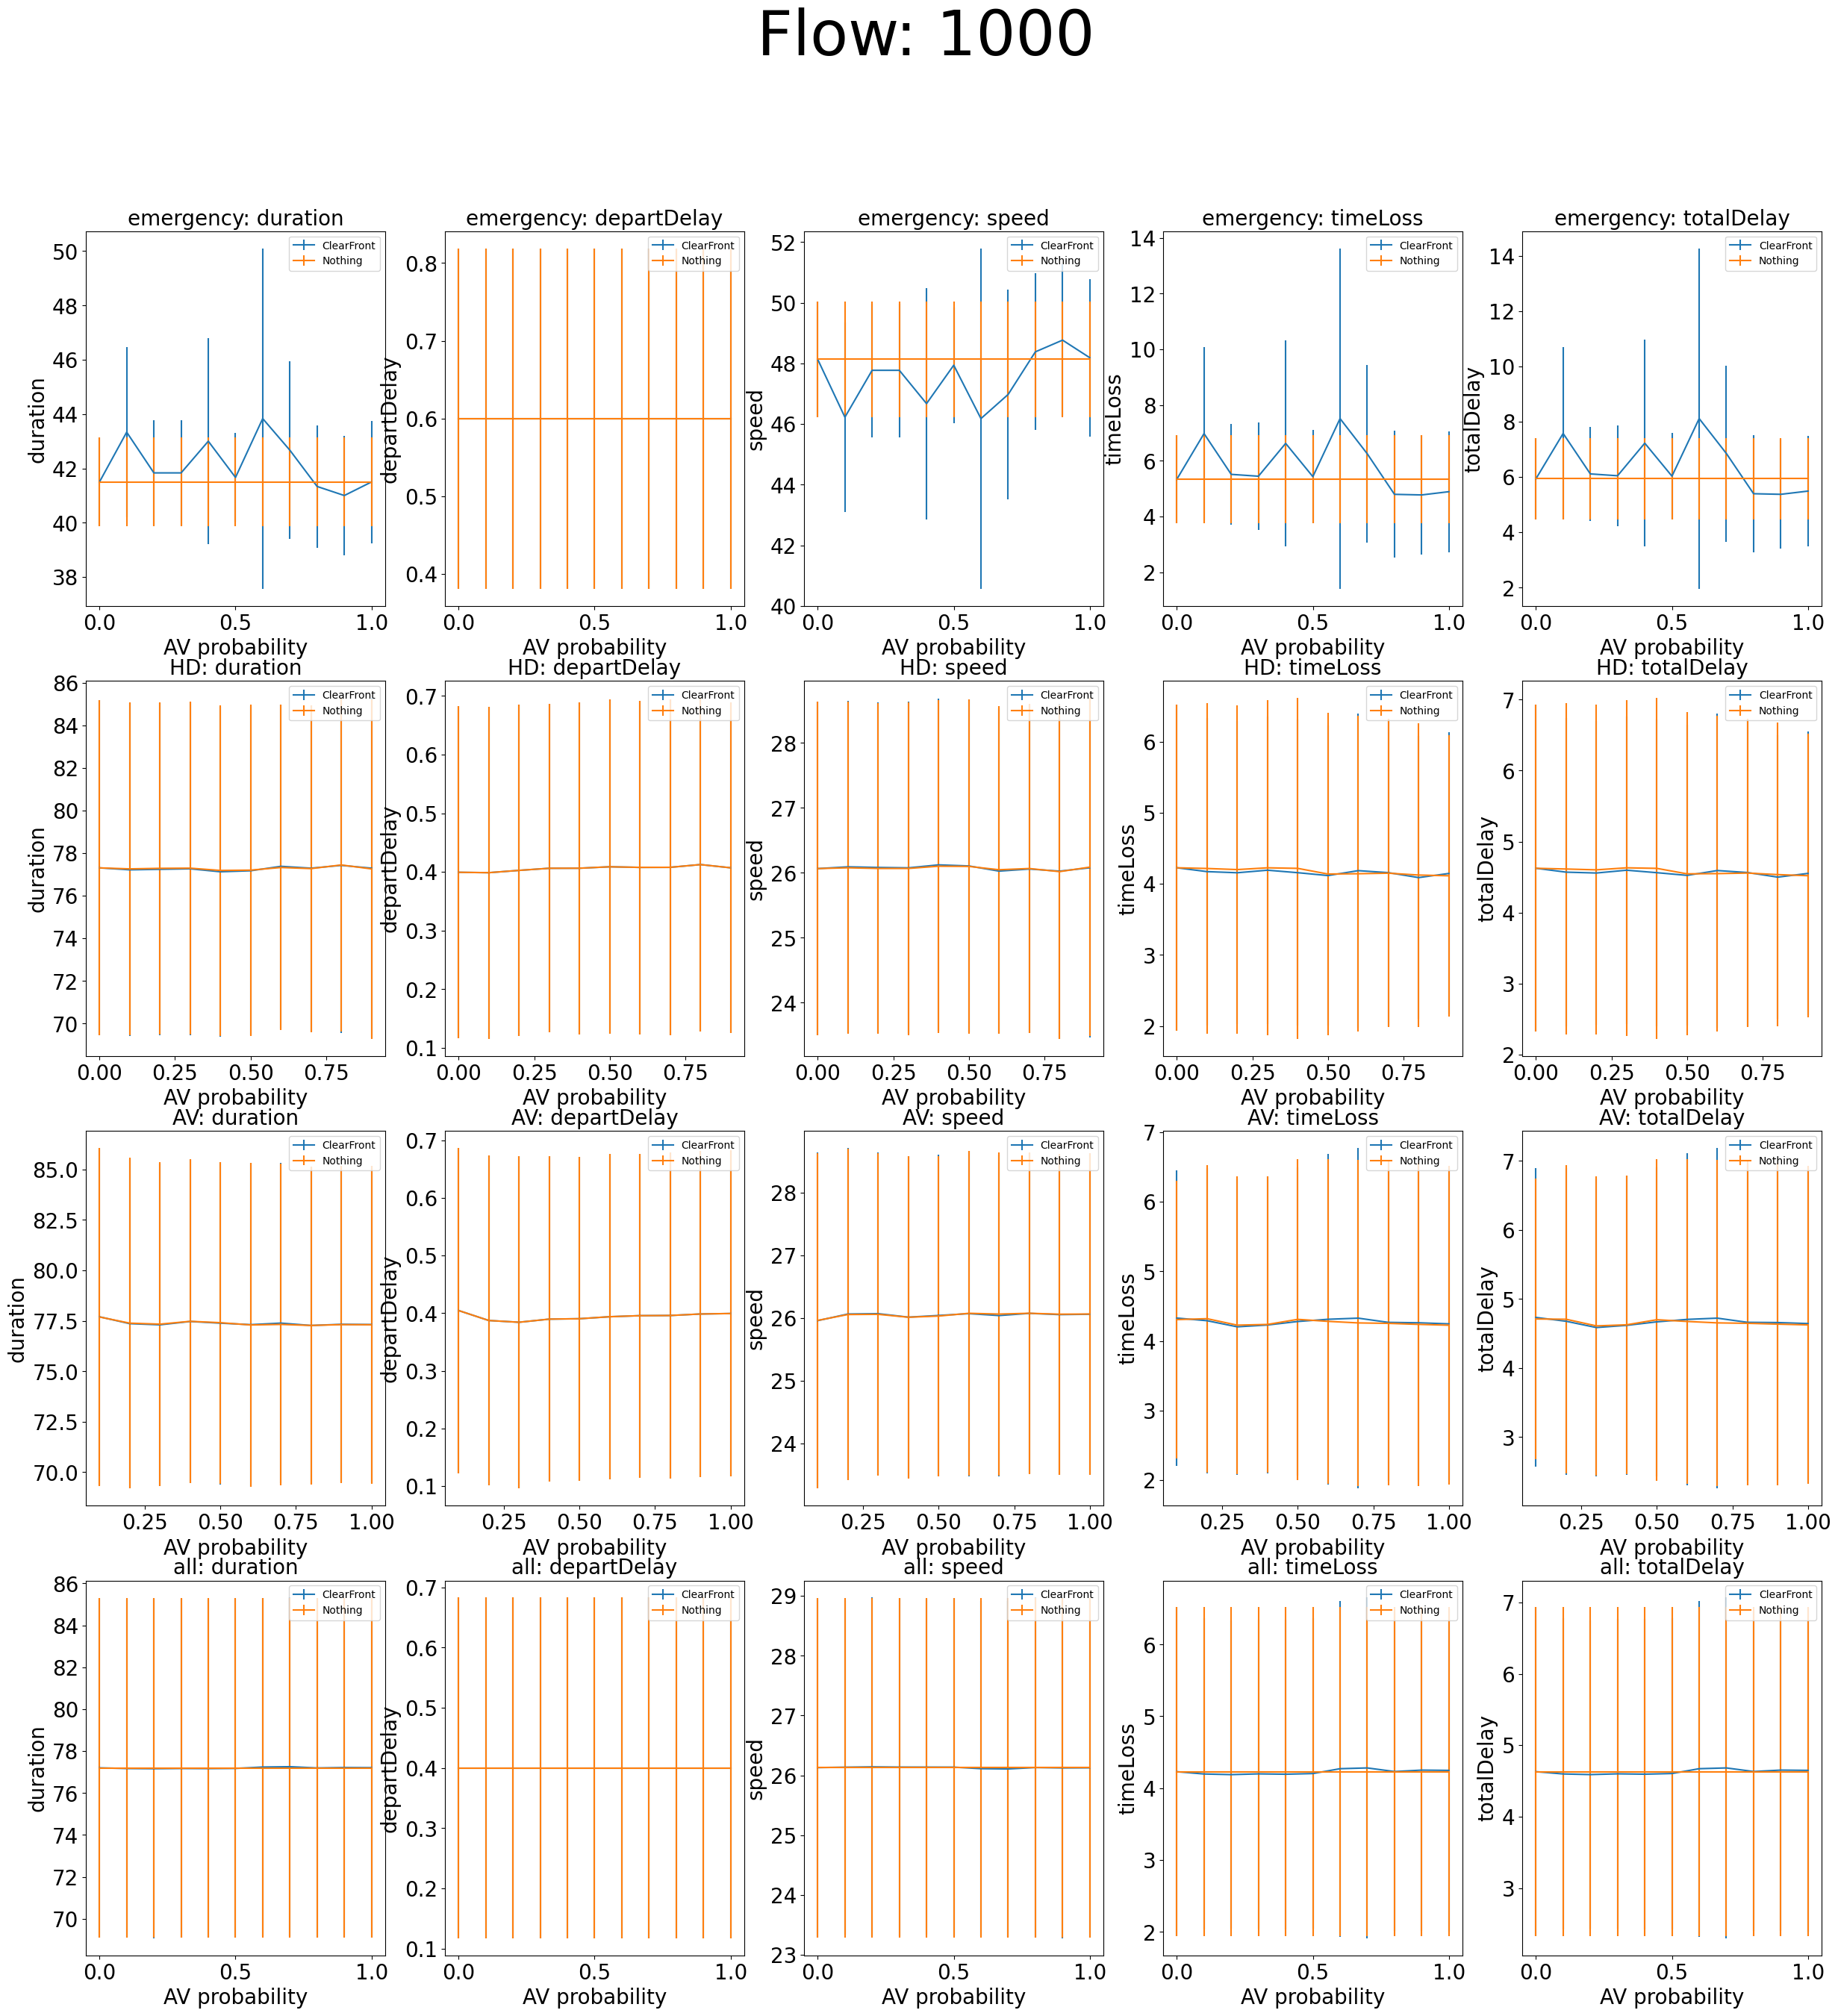

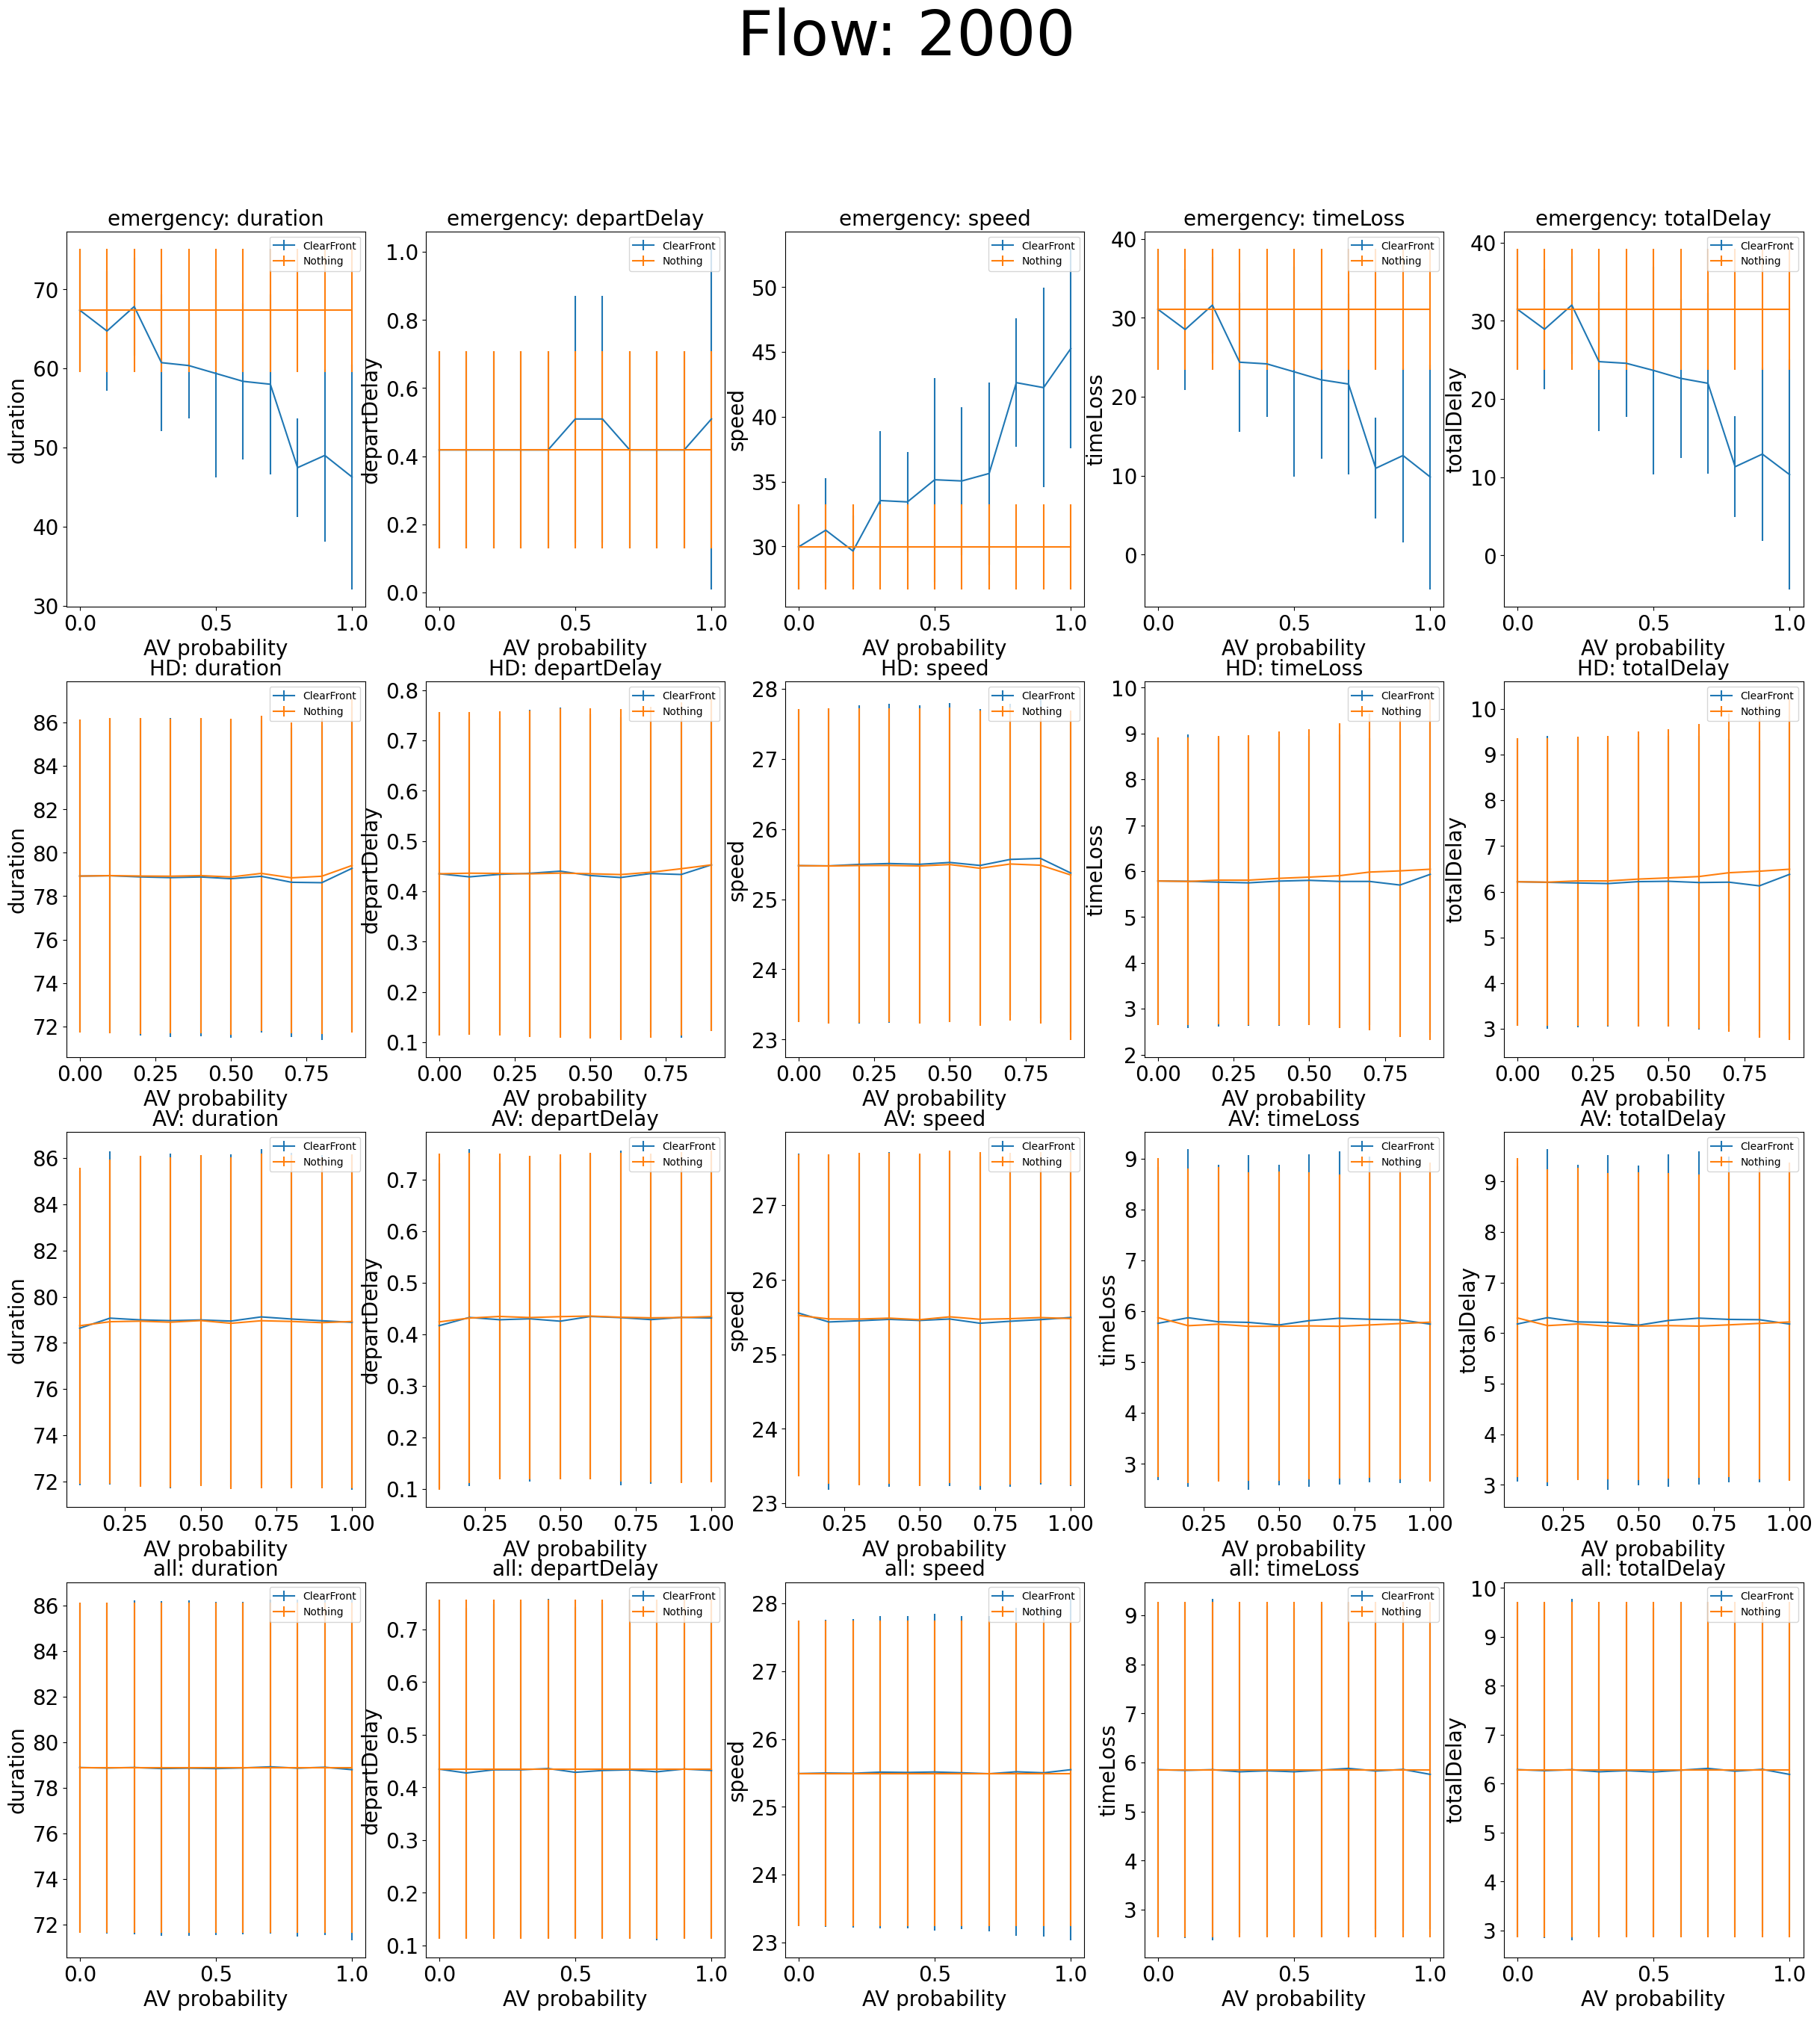

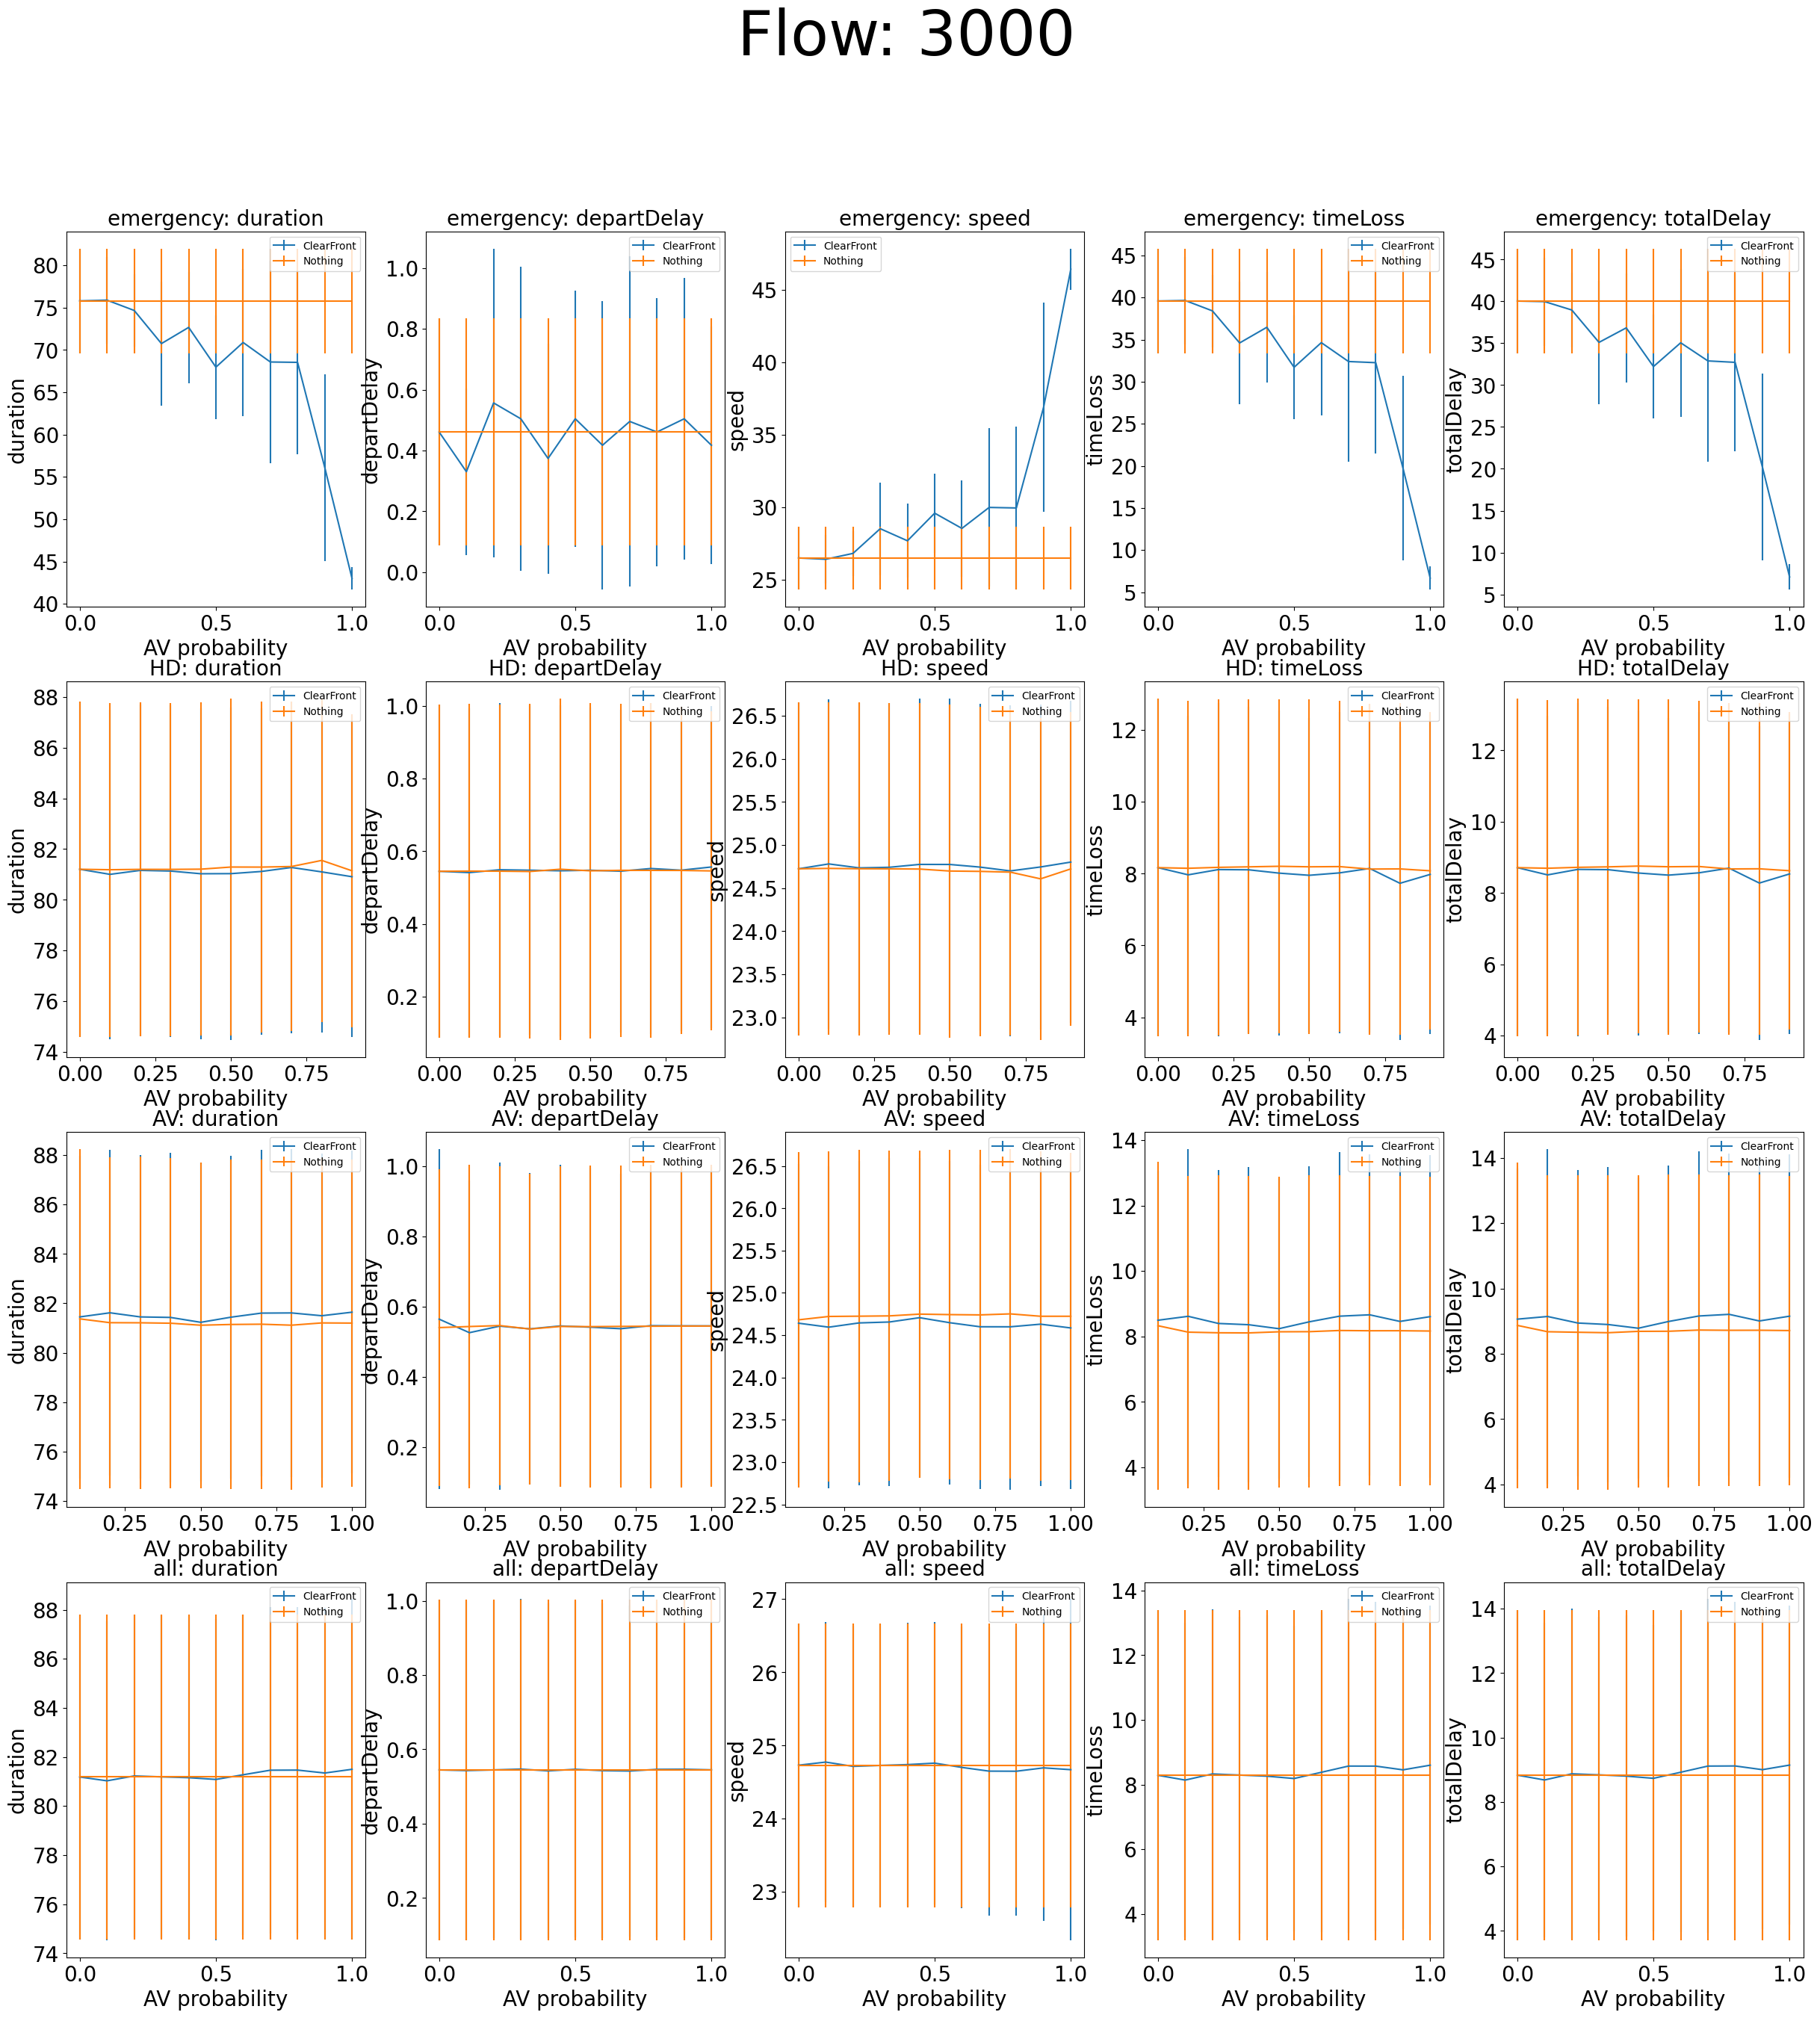

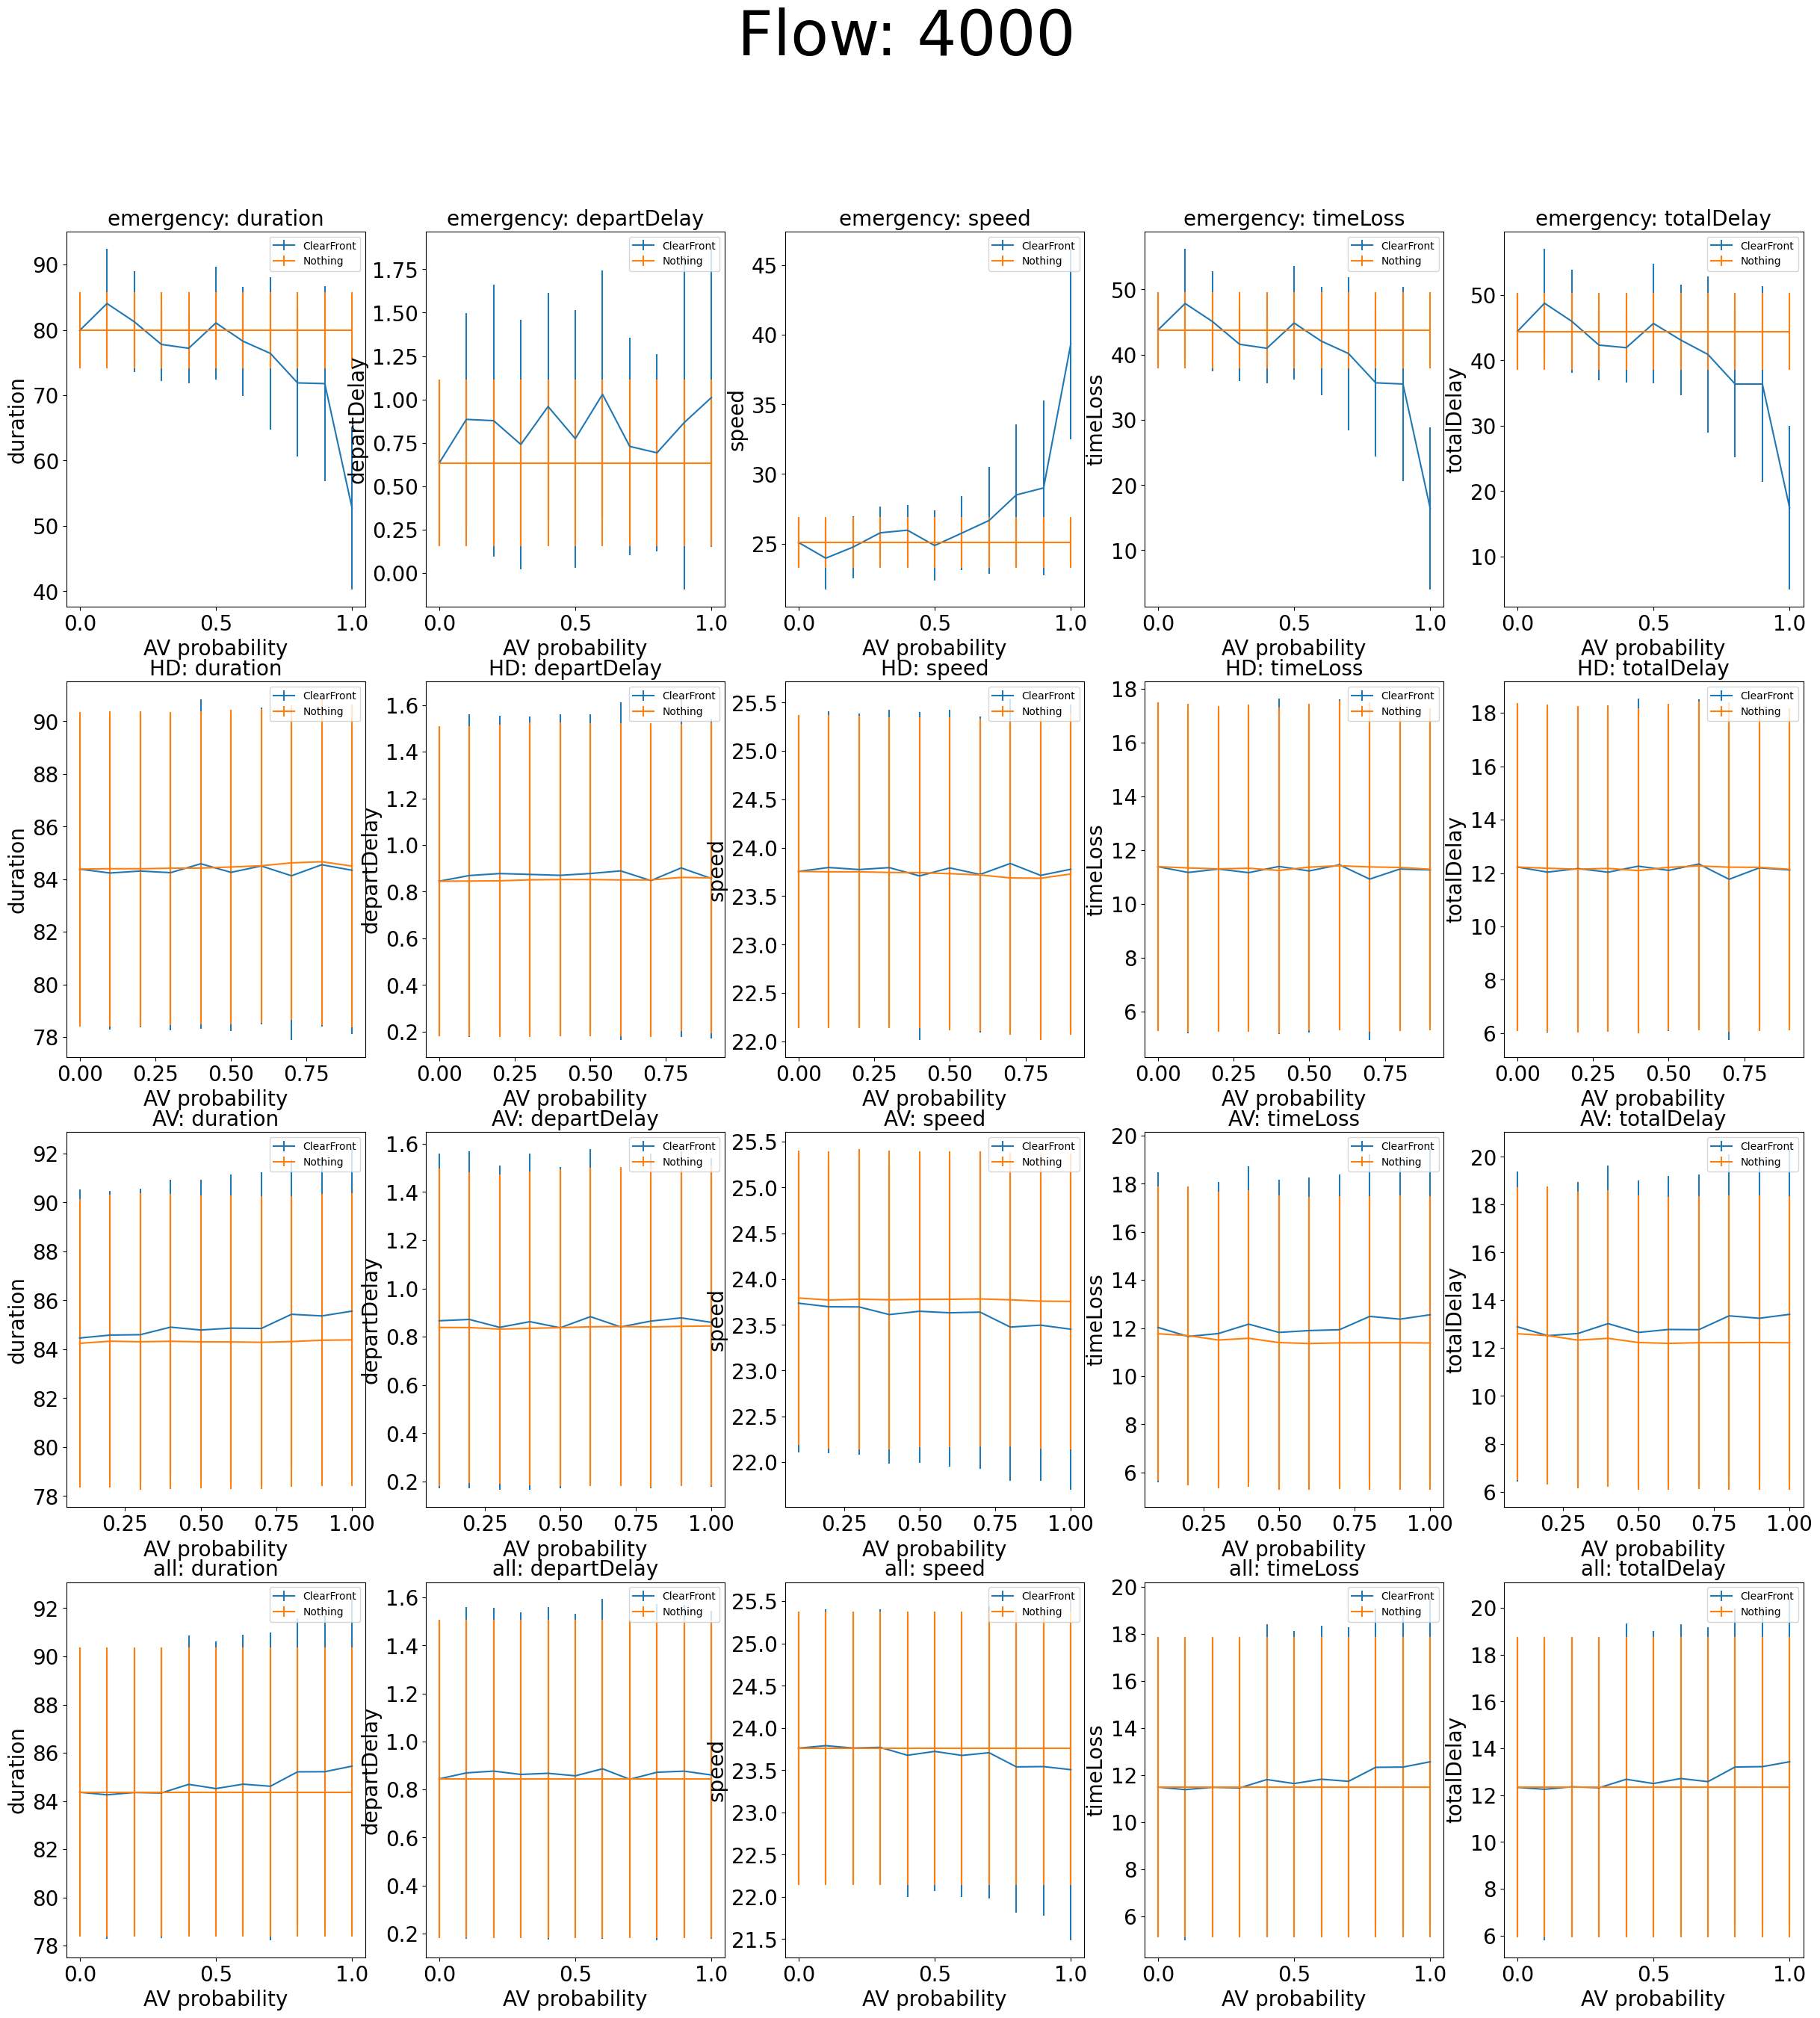

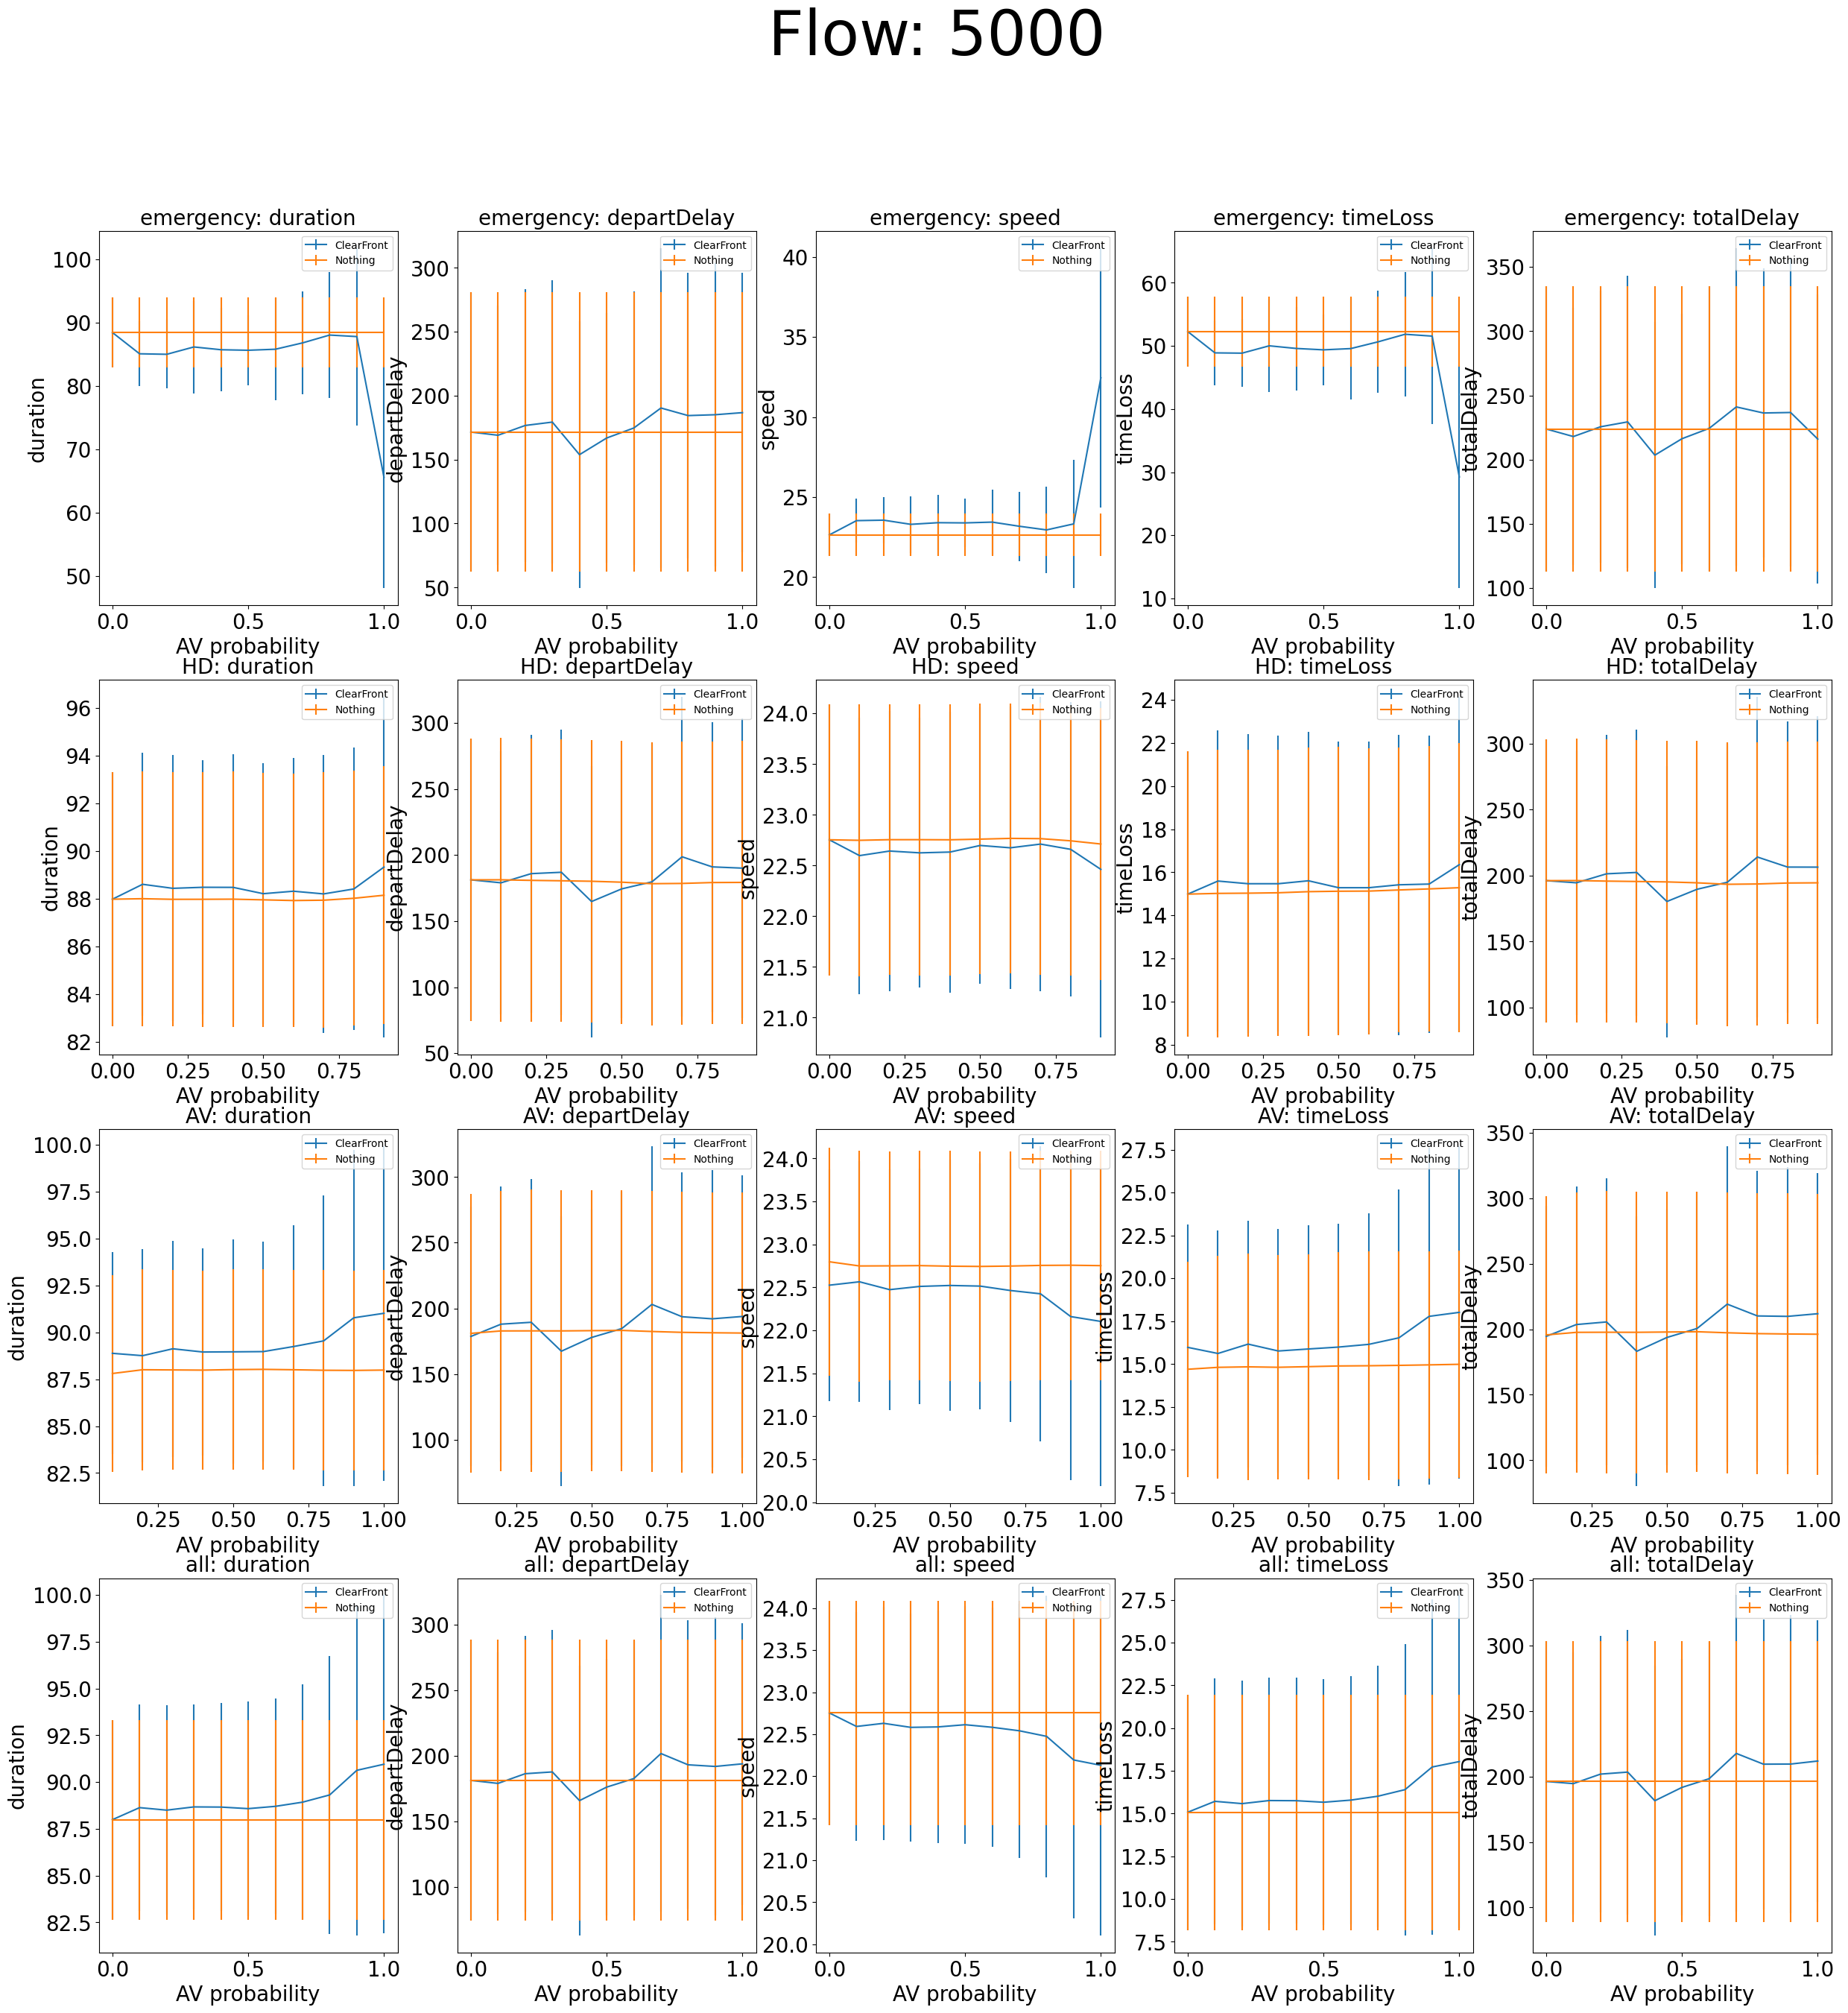

In [3]:
for flow in FLOWS:
    fig, axs = plt.subplots(len(vTypes), len(METRICS), figsize=(30, 30))
    fig.suptitle('Flow: {}'.format(flow), fontsize=fontsize*3)
    for policy in POLICY_NAMES:
        df = pd.read_pickle("results_csvs_server/{}_flow_{}_long.pkl".format(policy, flow))
        for i, vType in enumerate(vTypes):
            for j, metric in enumerate(METRICS):
                axs[i,j].errorbar(df.index, df[vType][f"avg_{metric}"], yerr=df[vType][f"std_{metric}"]
                                    , label=policy)
                axs[i,j].set_title("{}: {}".format(vType, metric), fontsize=fontsize)
                axs[i,j].set_xlabel("AV probability", fontsize=fontsize)
                axs[i,j].set_ylabel(metric, fontsize=fontsize)
                axs[i,j].tick_params(axis='both', which='major', labelsize=fontsize)
                axs[i,j].legend()
    plt.show()

ClearFront: Num of emergency vehicles: 6.0


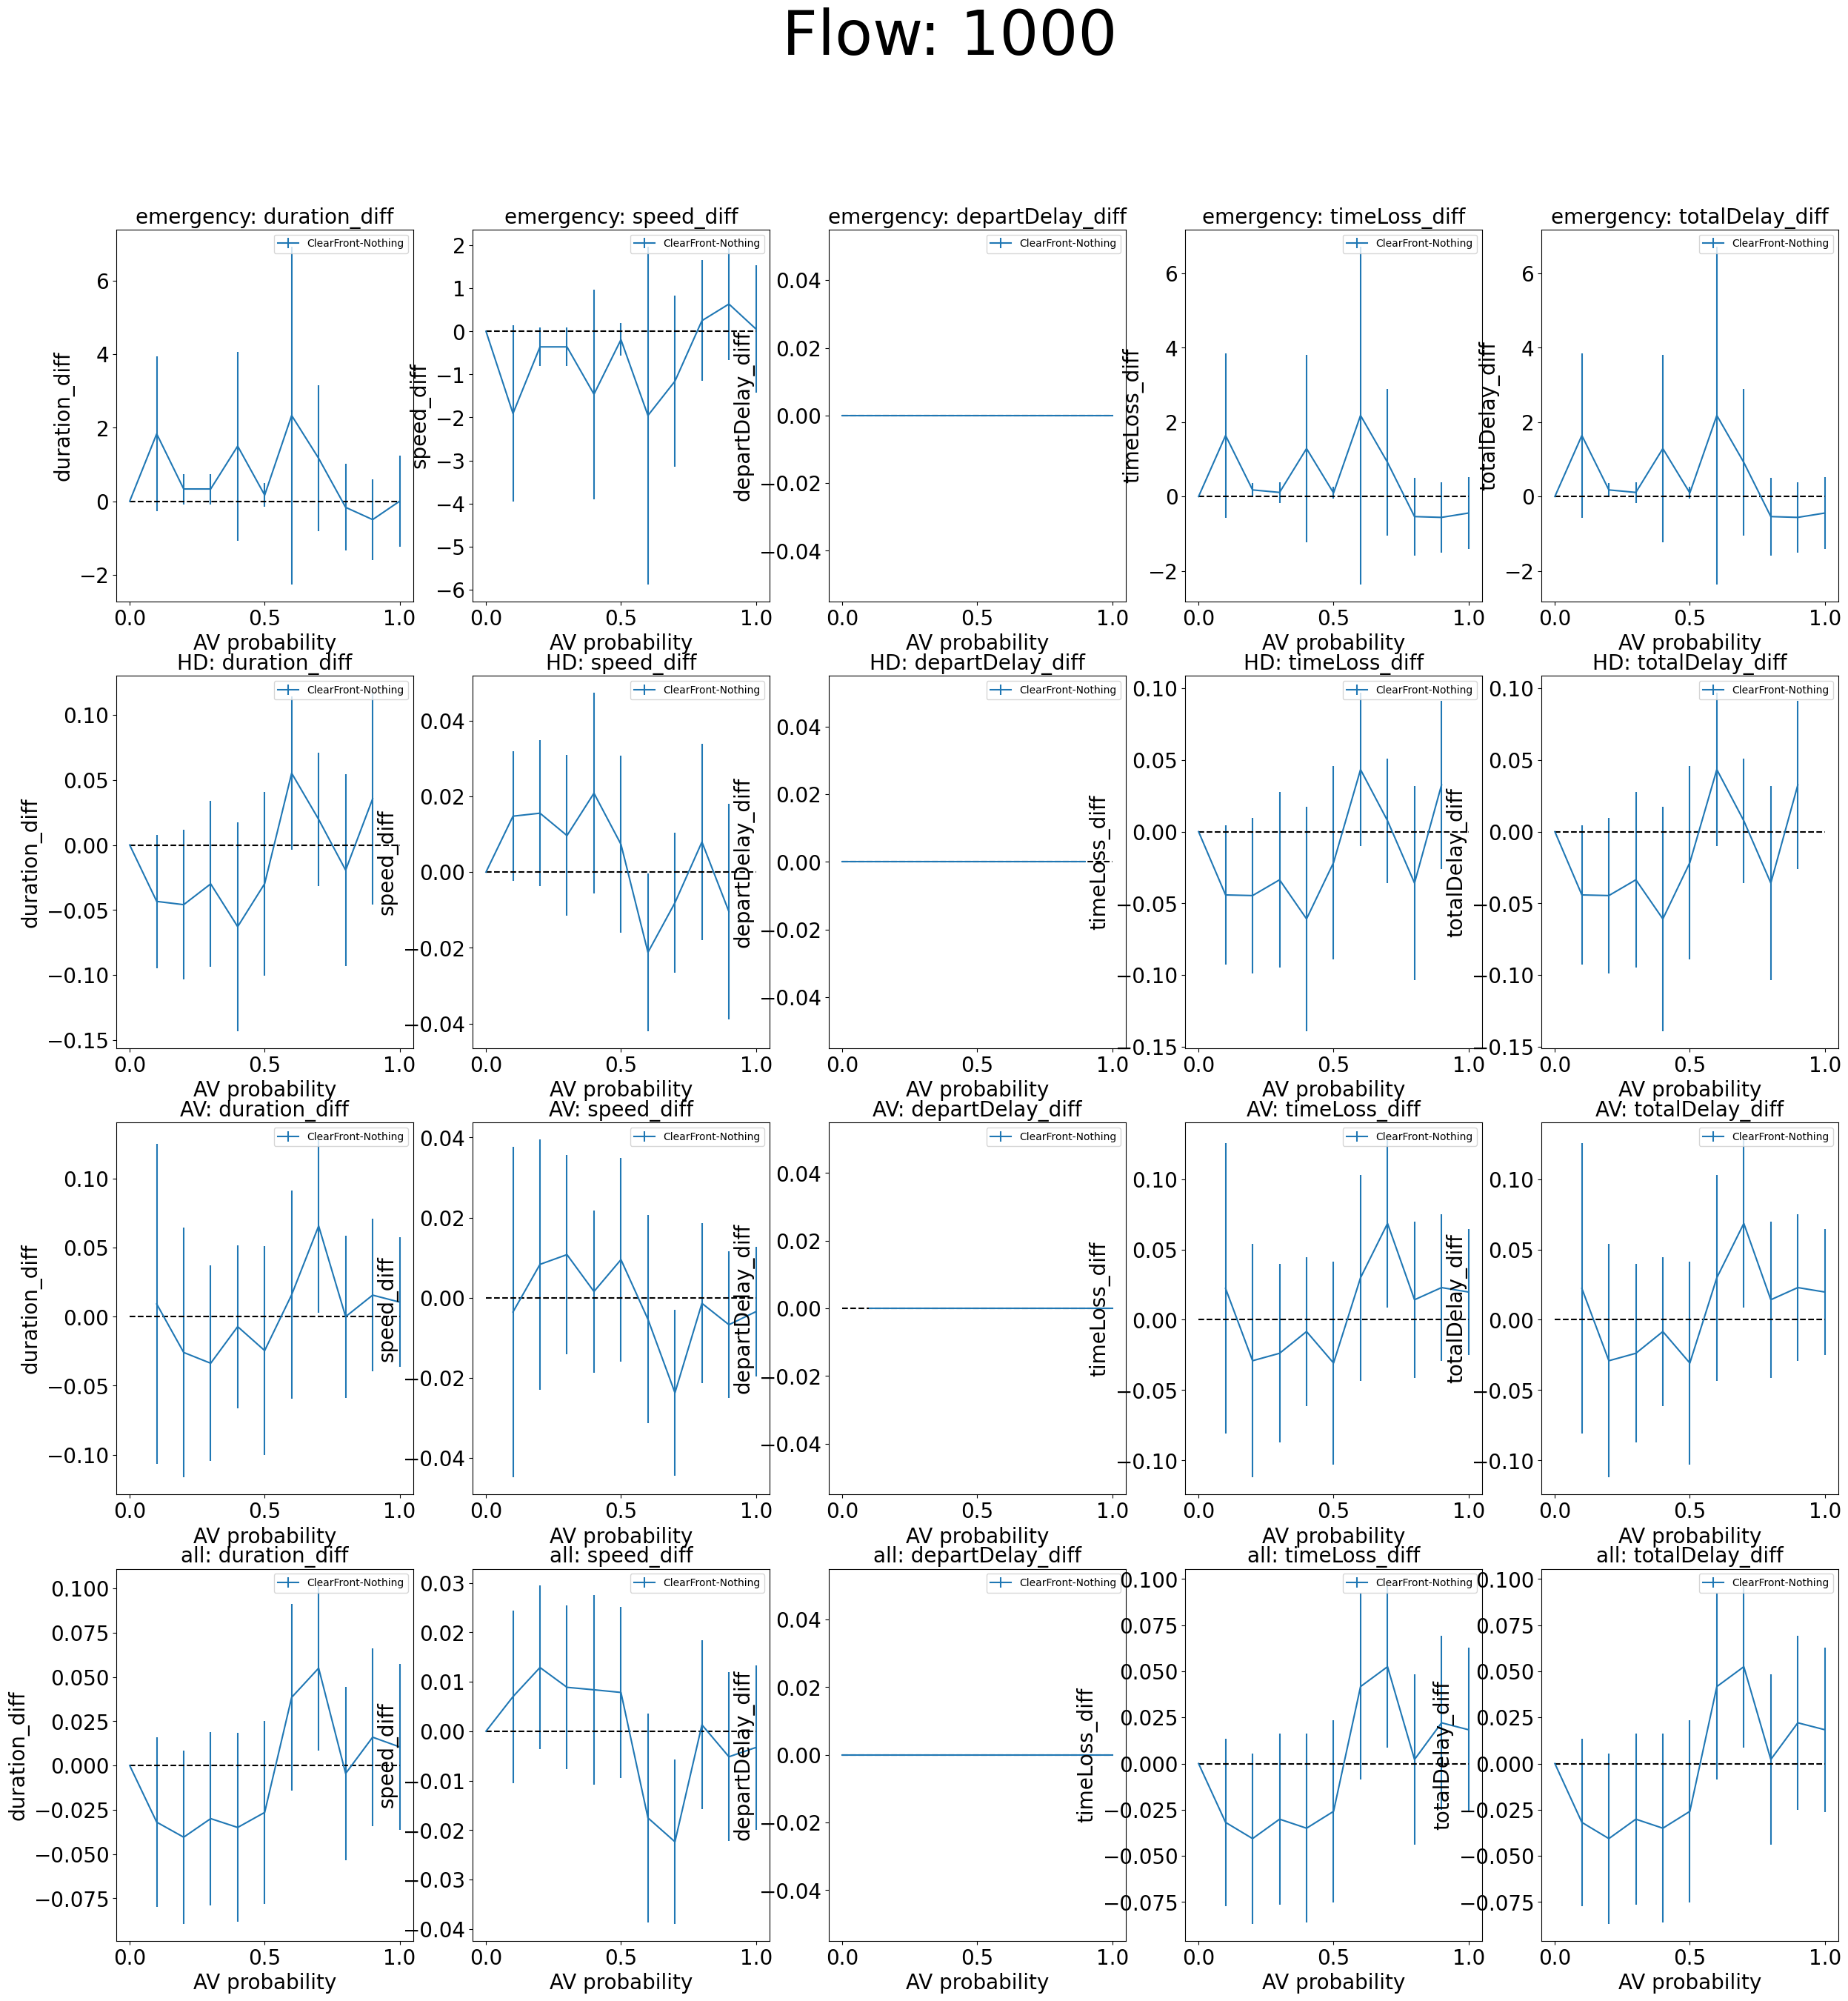

ClearFront: Num of emergency vehicles: 11.0


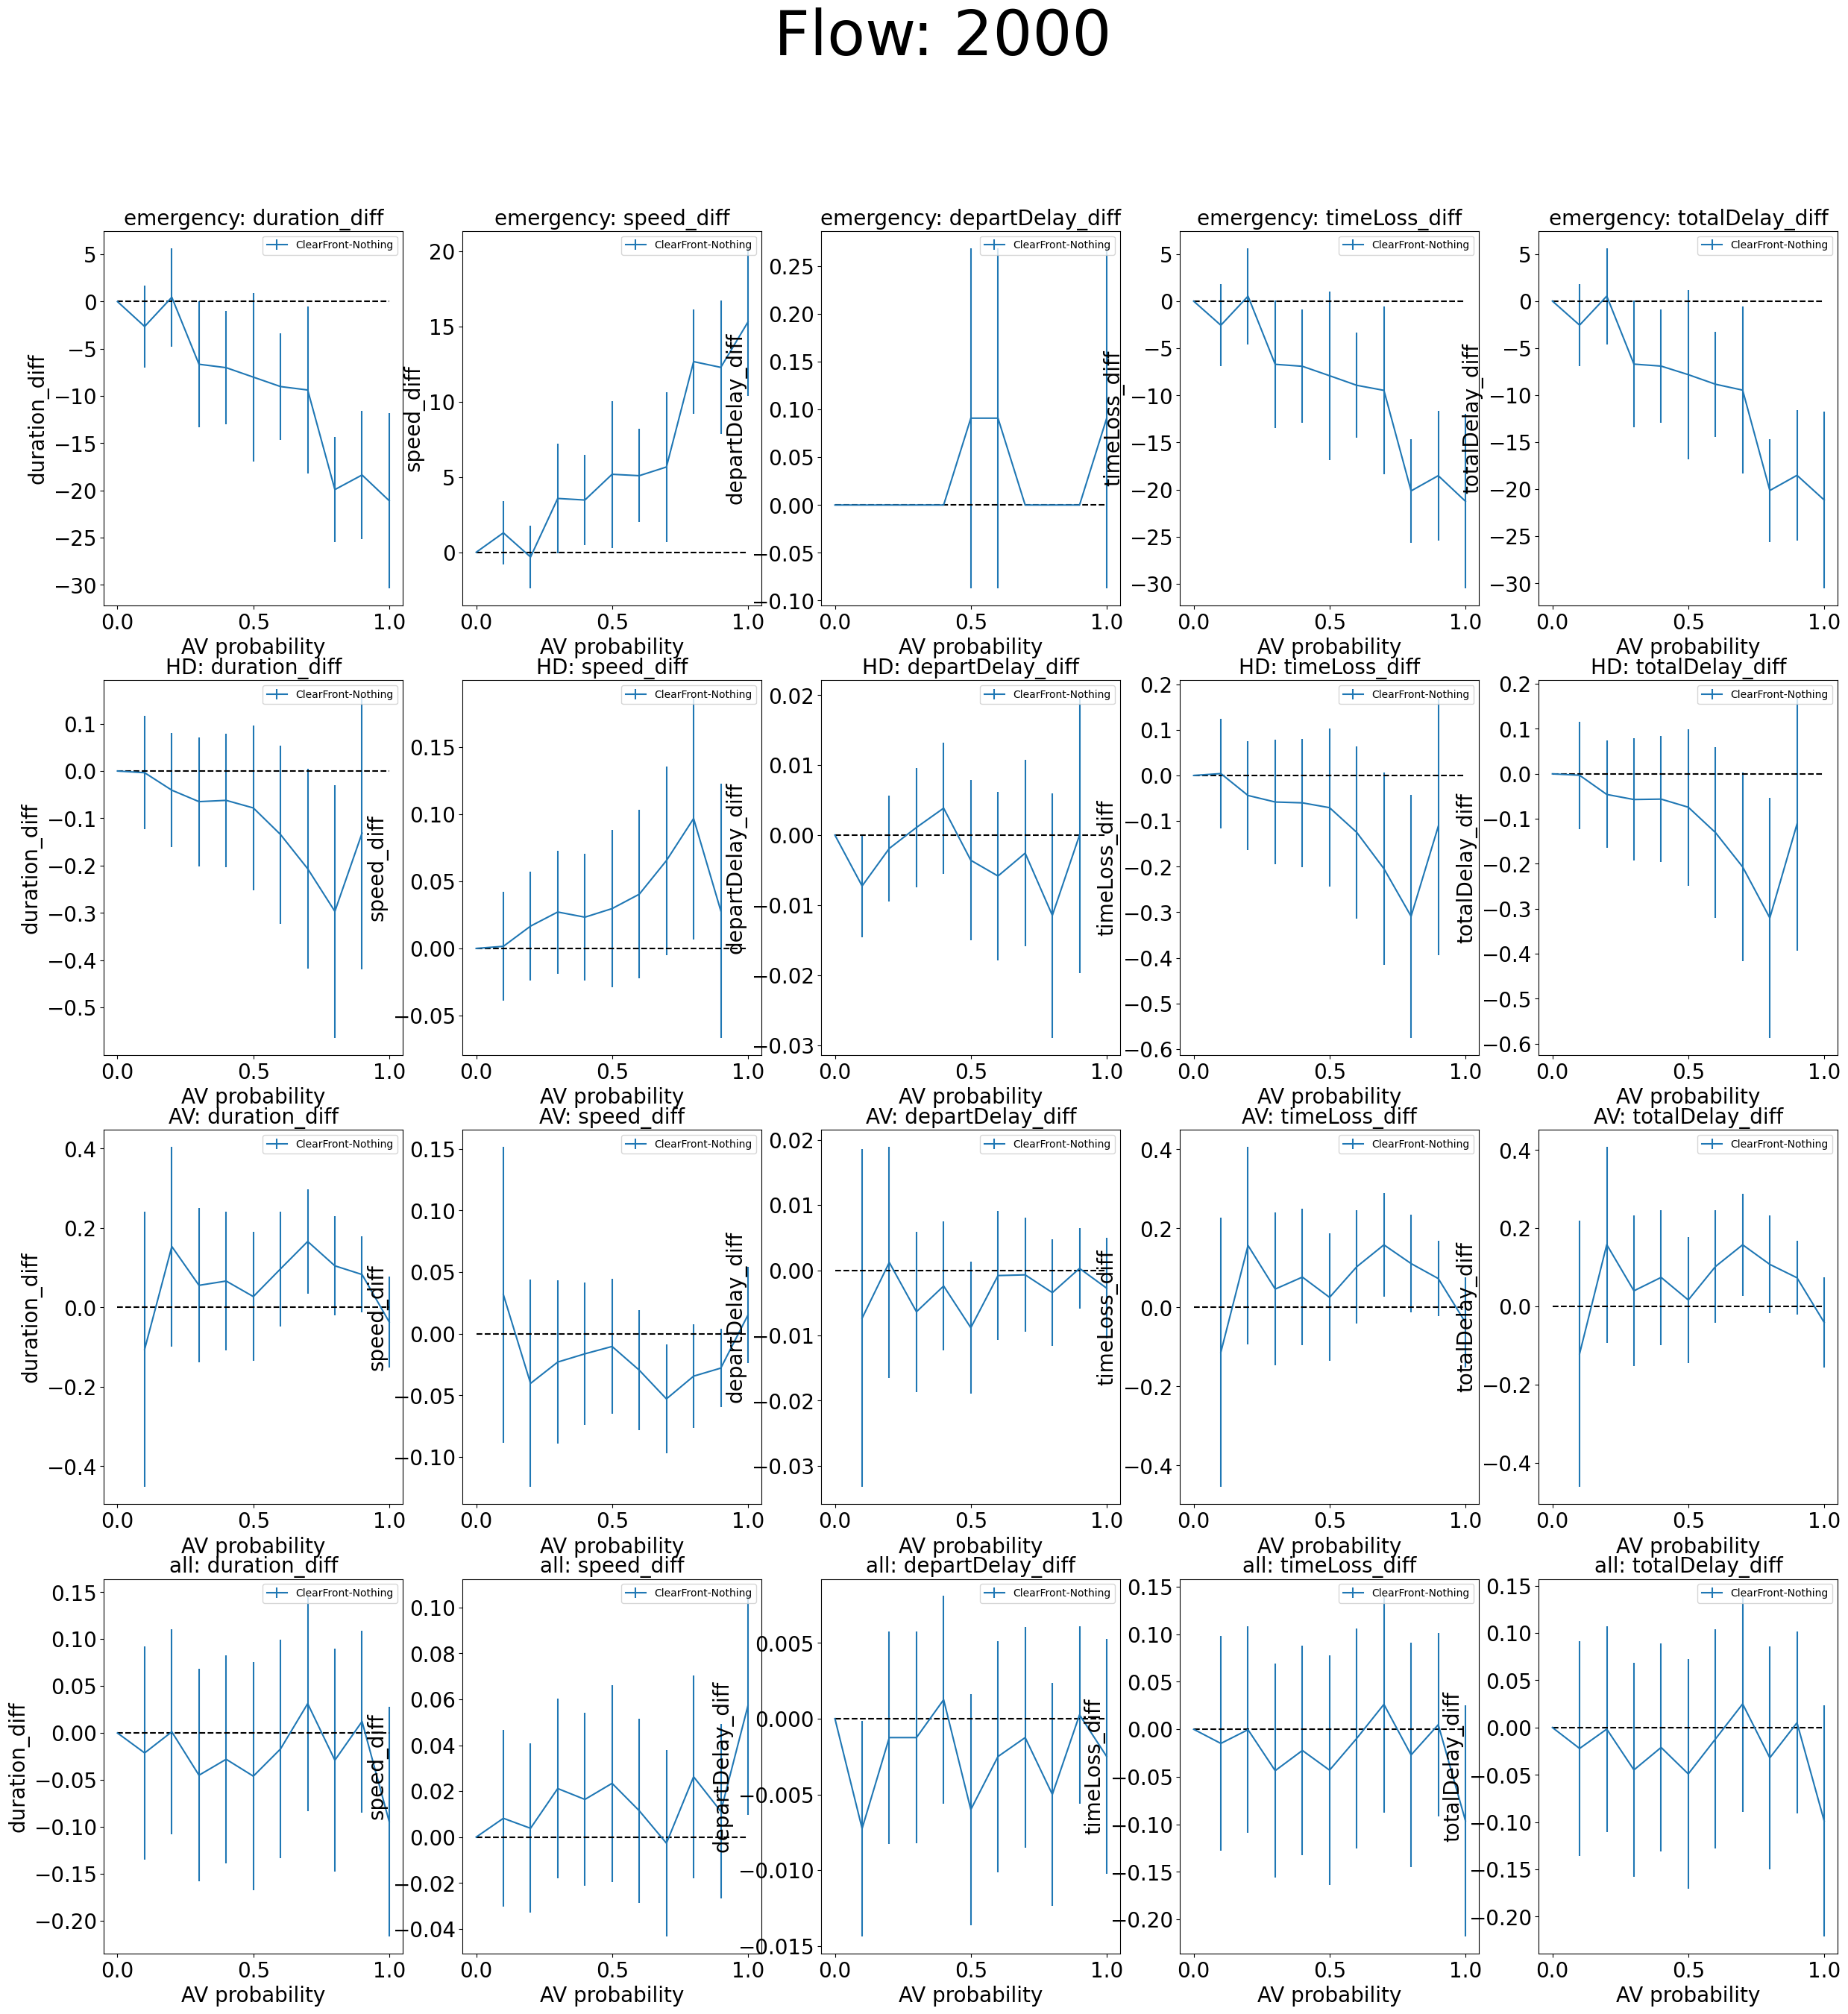

ClearFront: Num of emergency vehicles: 23.0


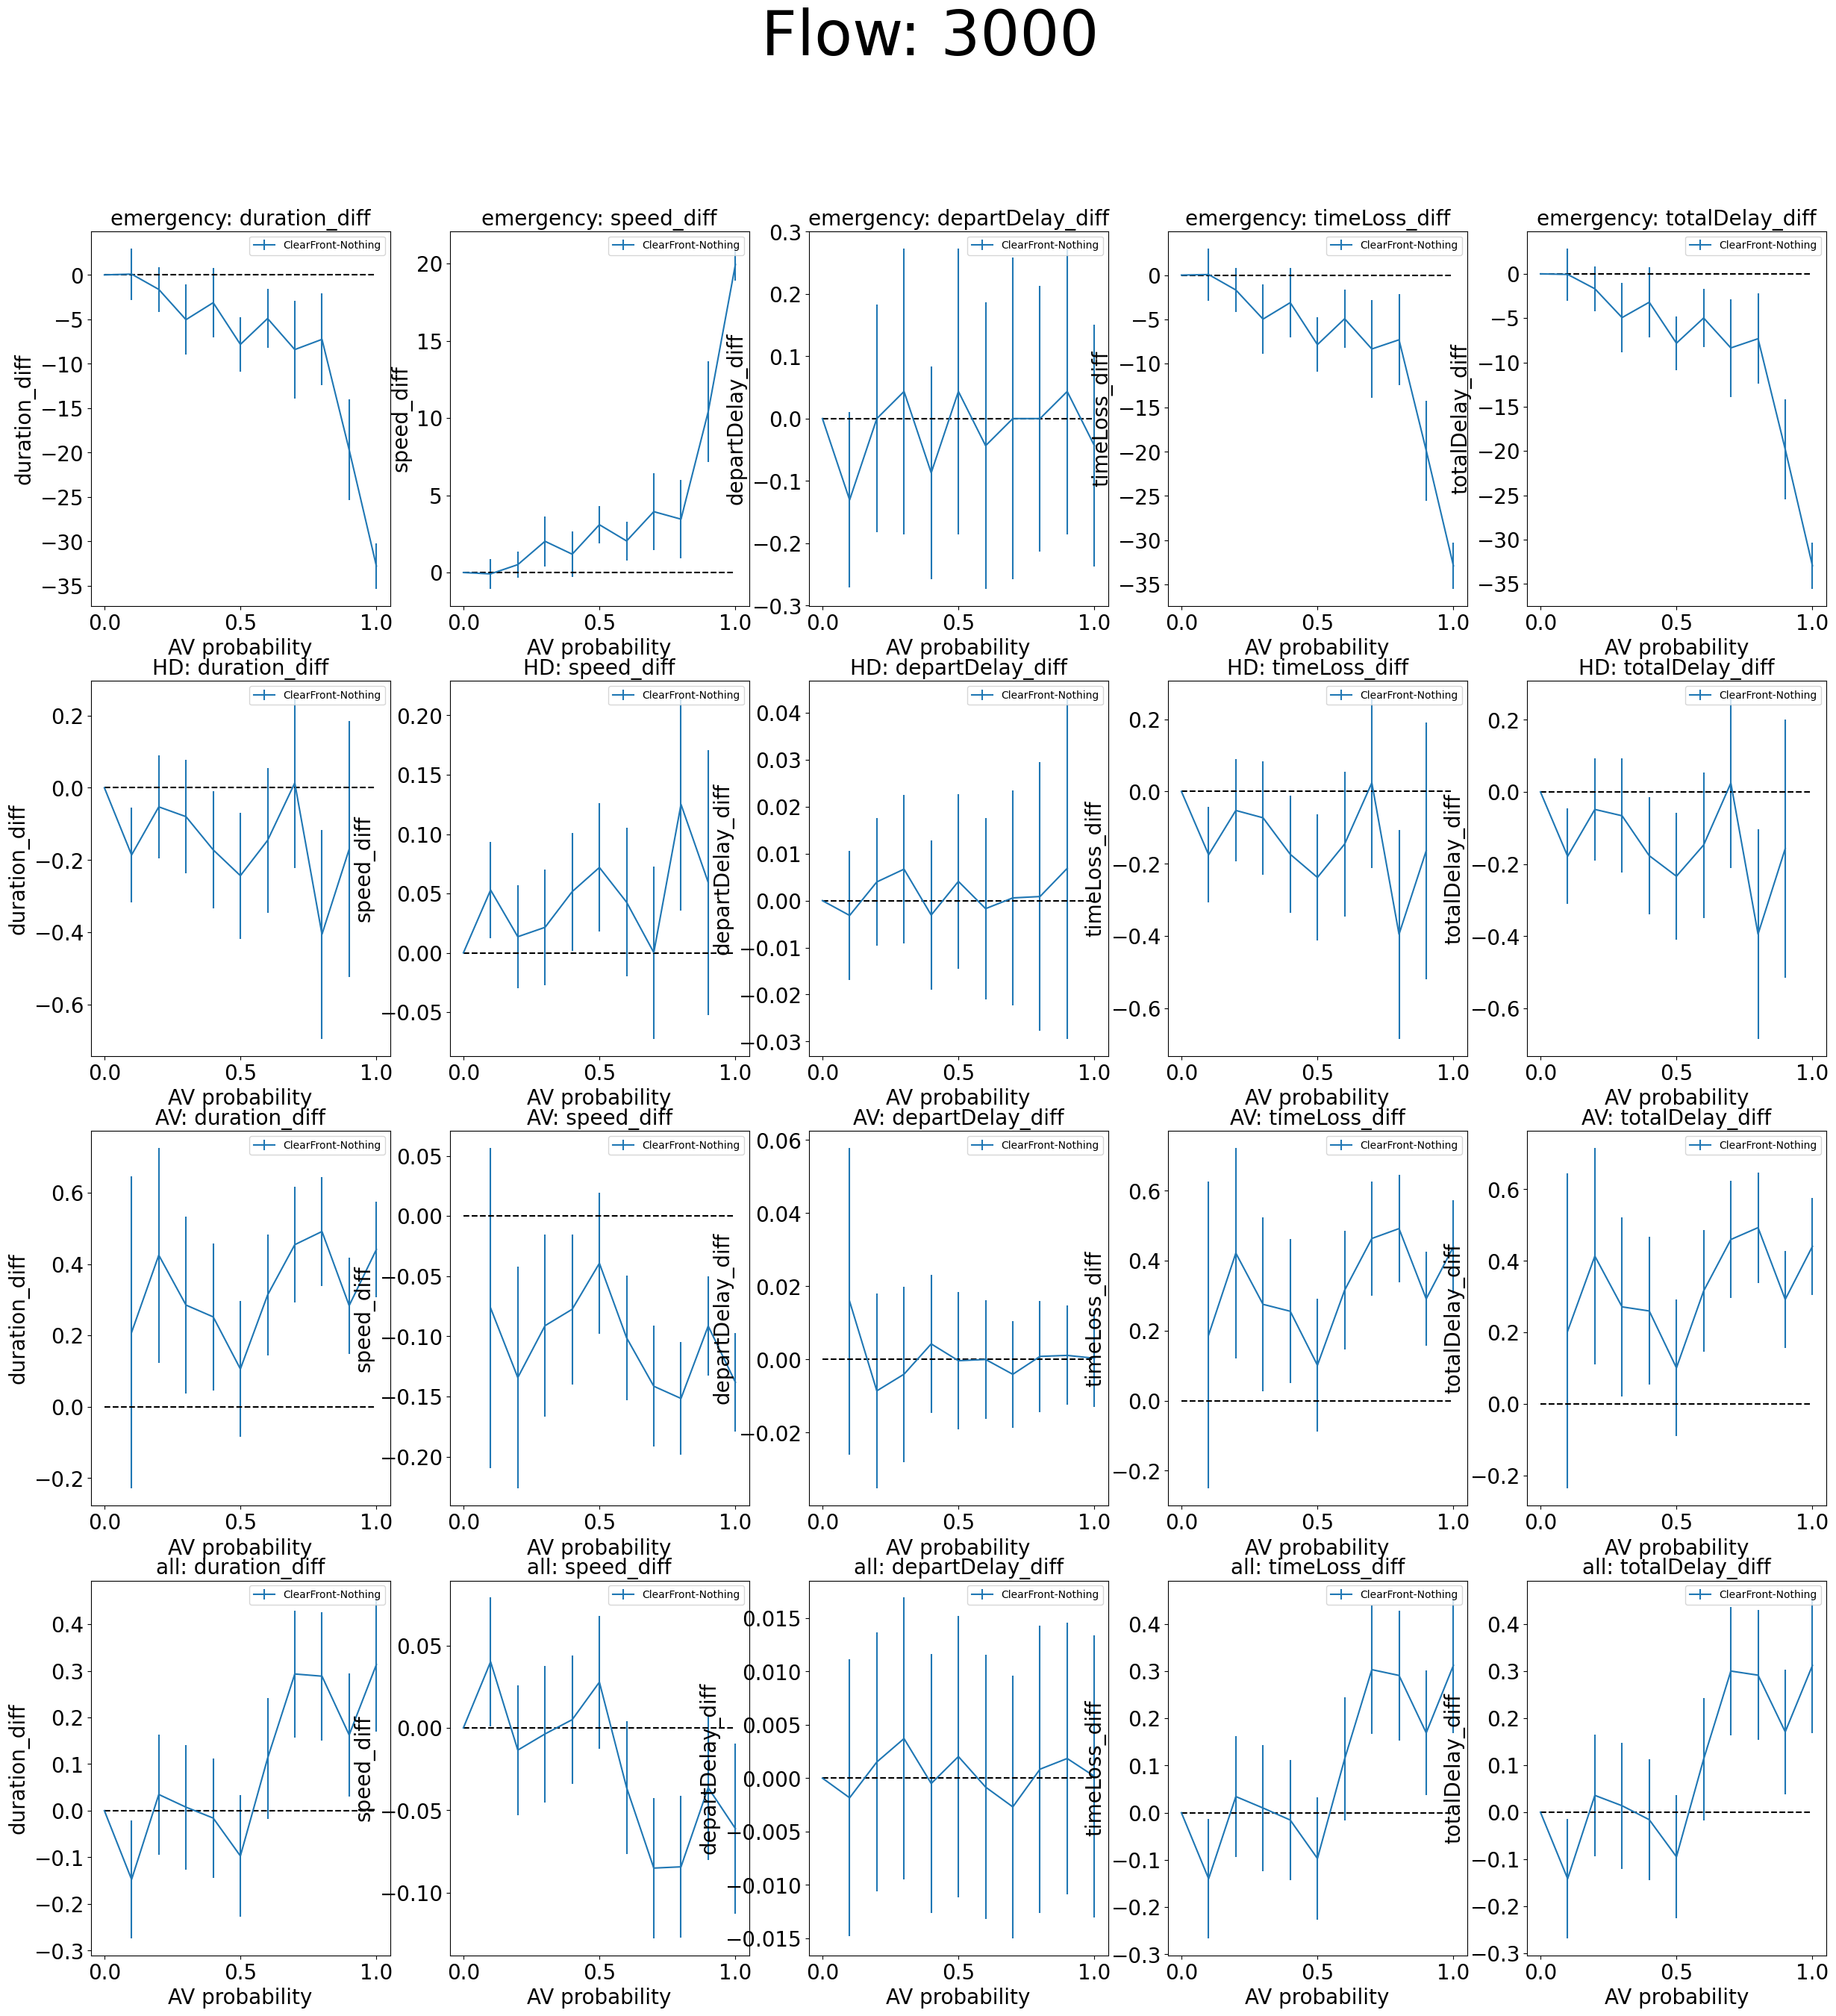

ClearFront: Num of emergency vehicles: 27.0


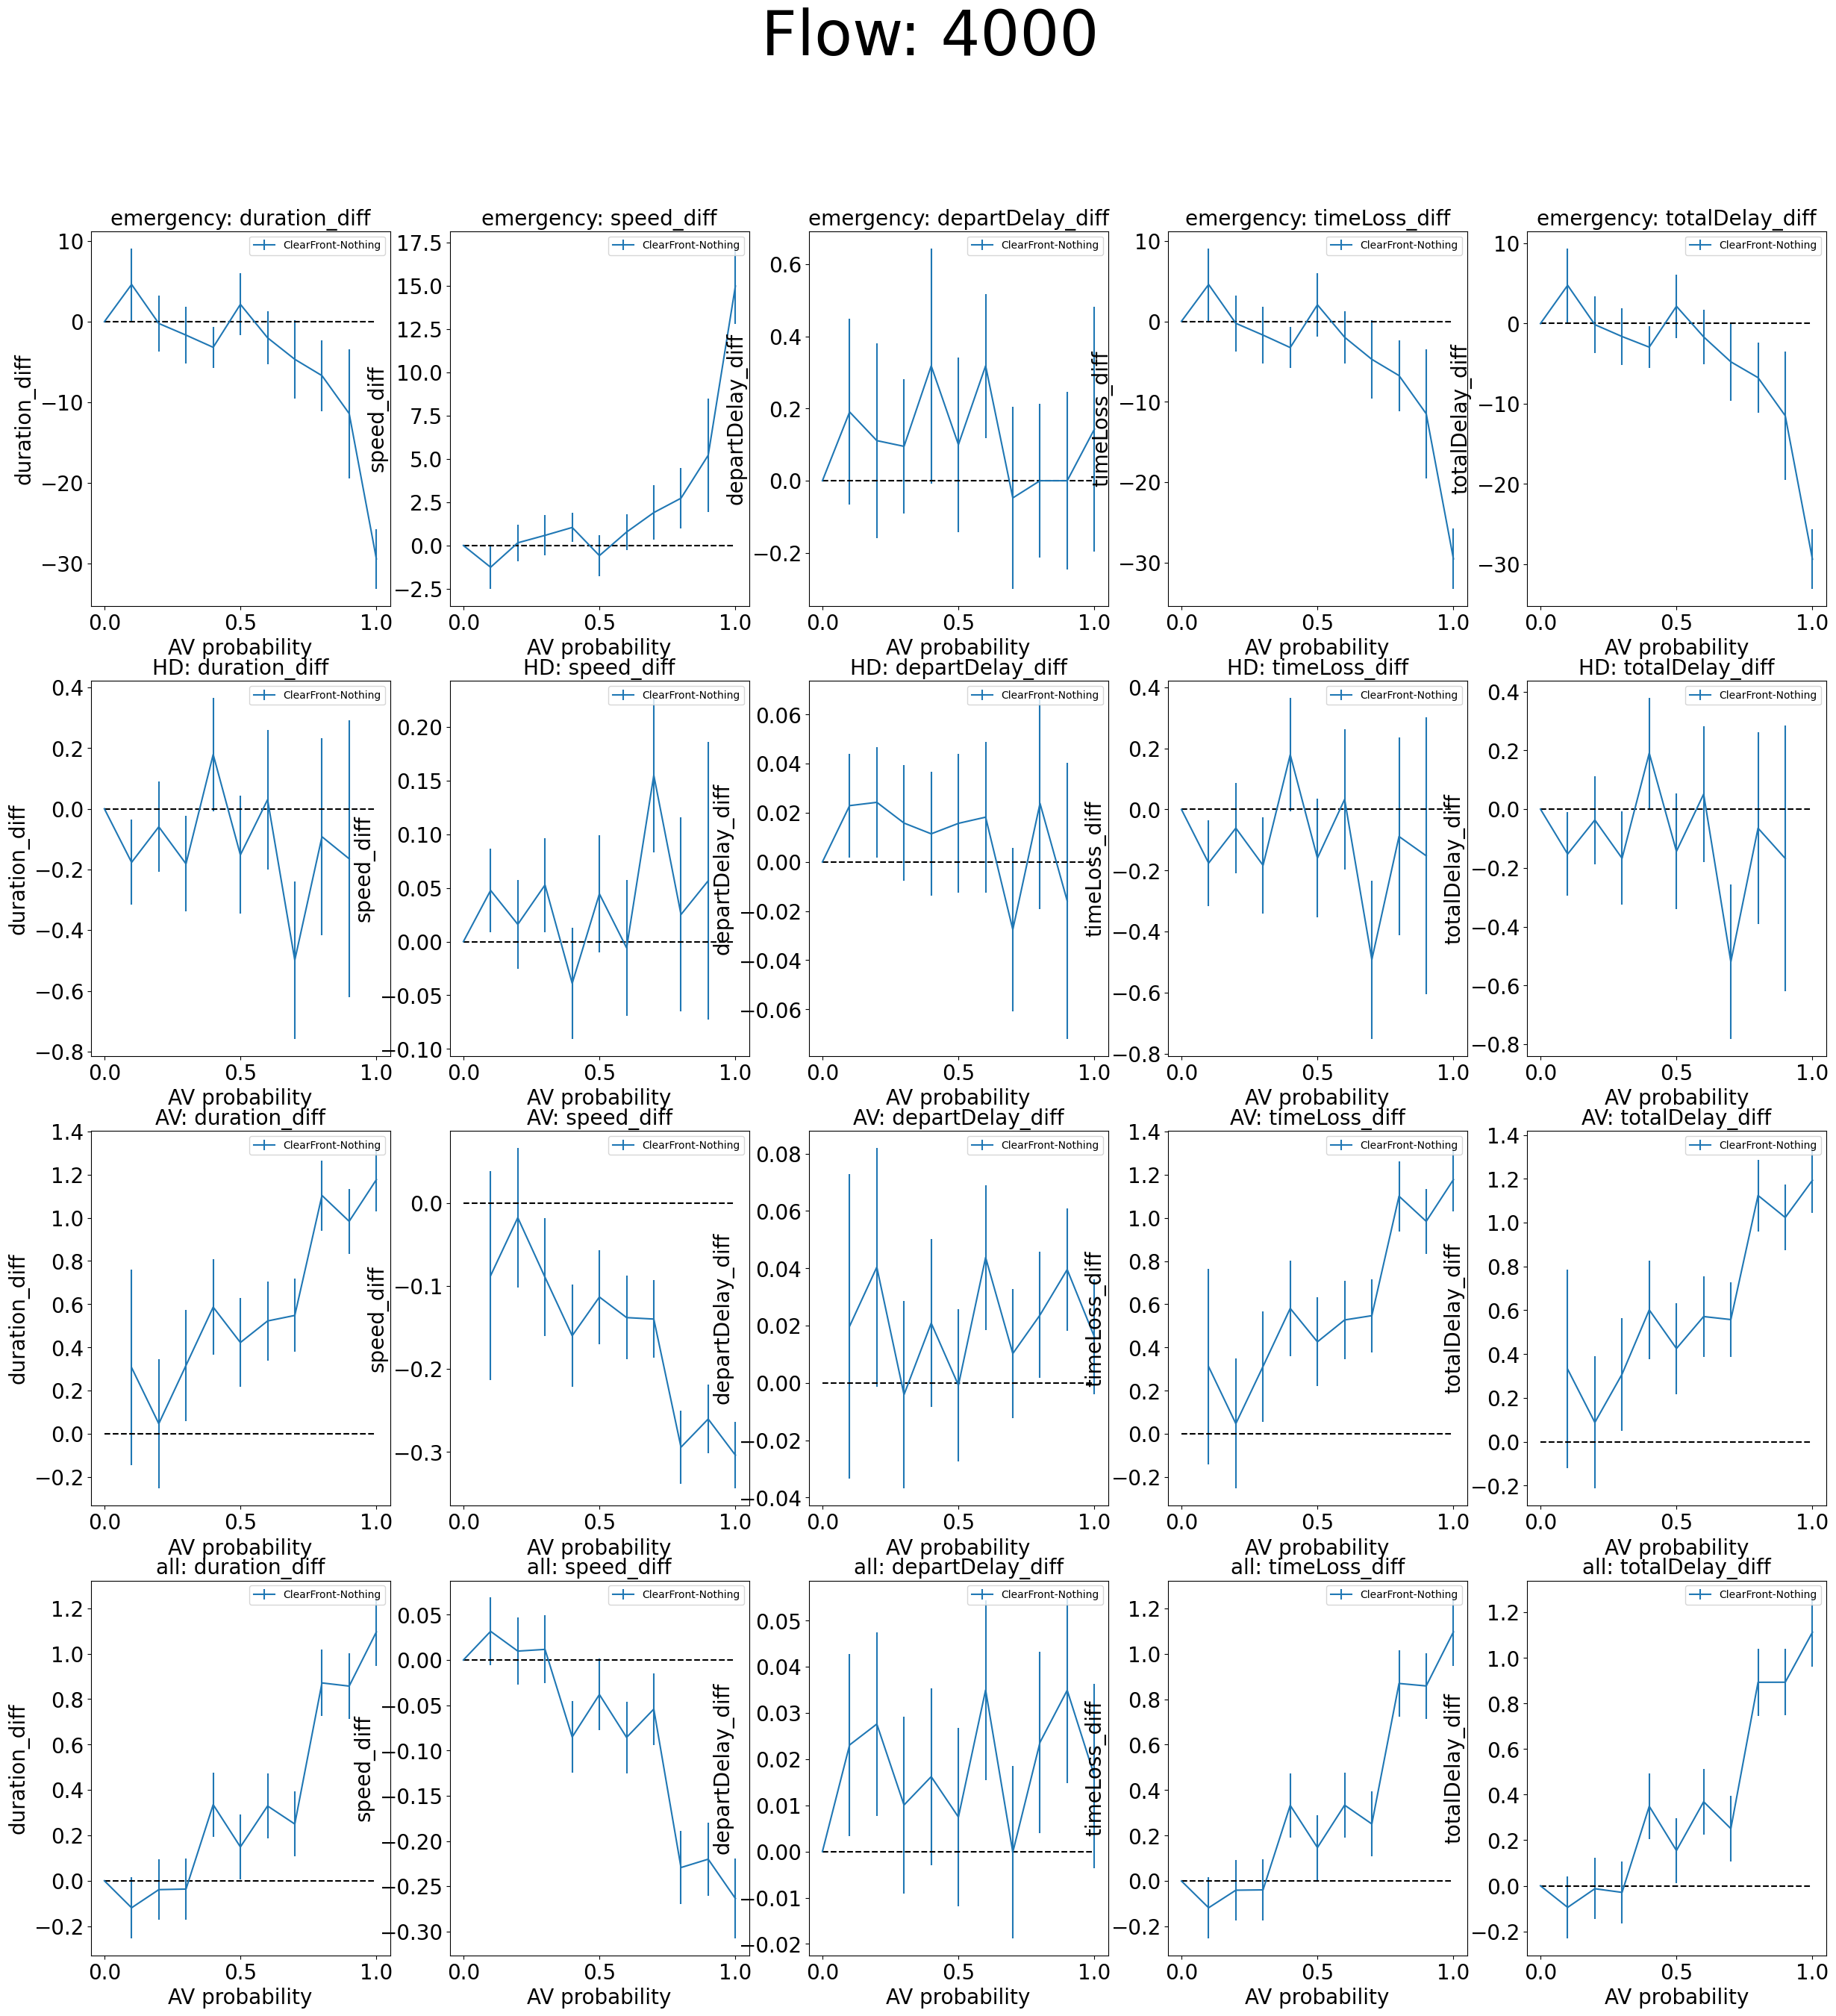

ClearFront: Num of emergency vehicles: 25.0


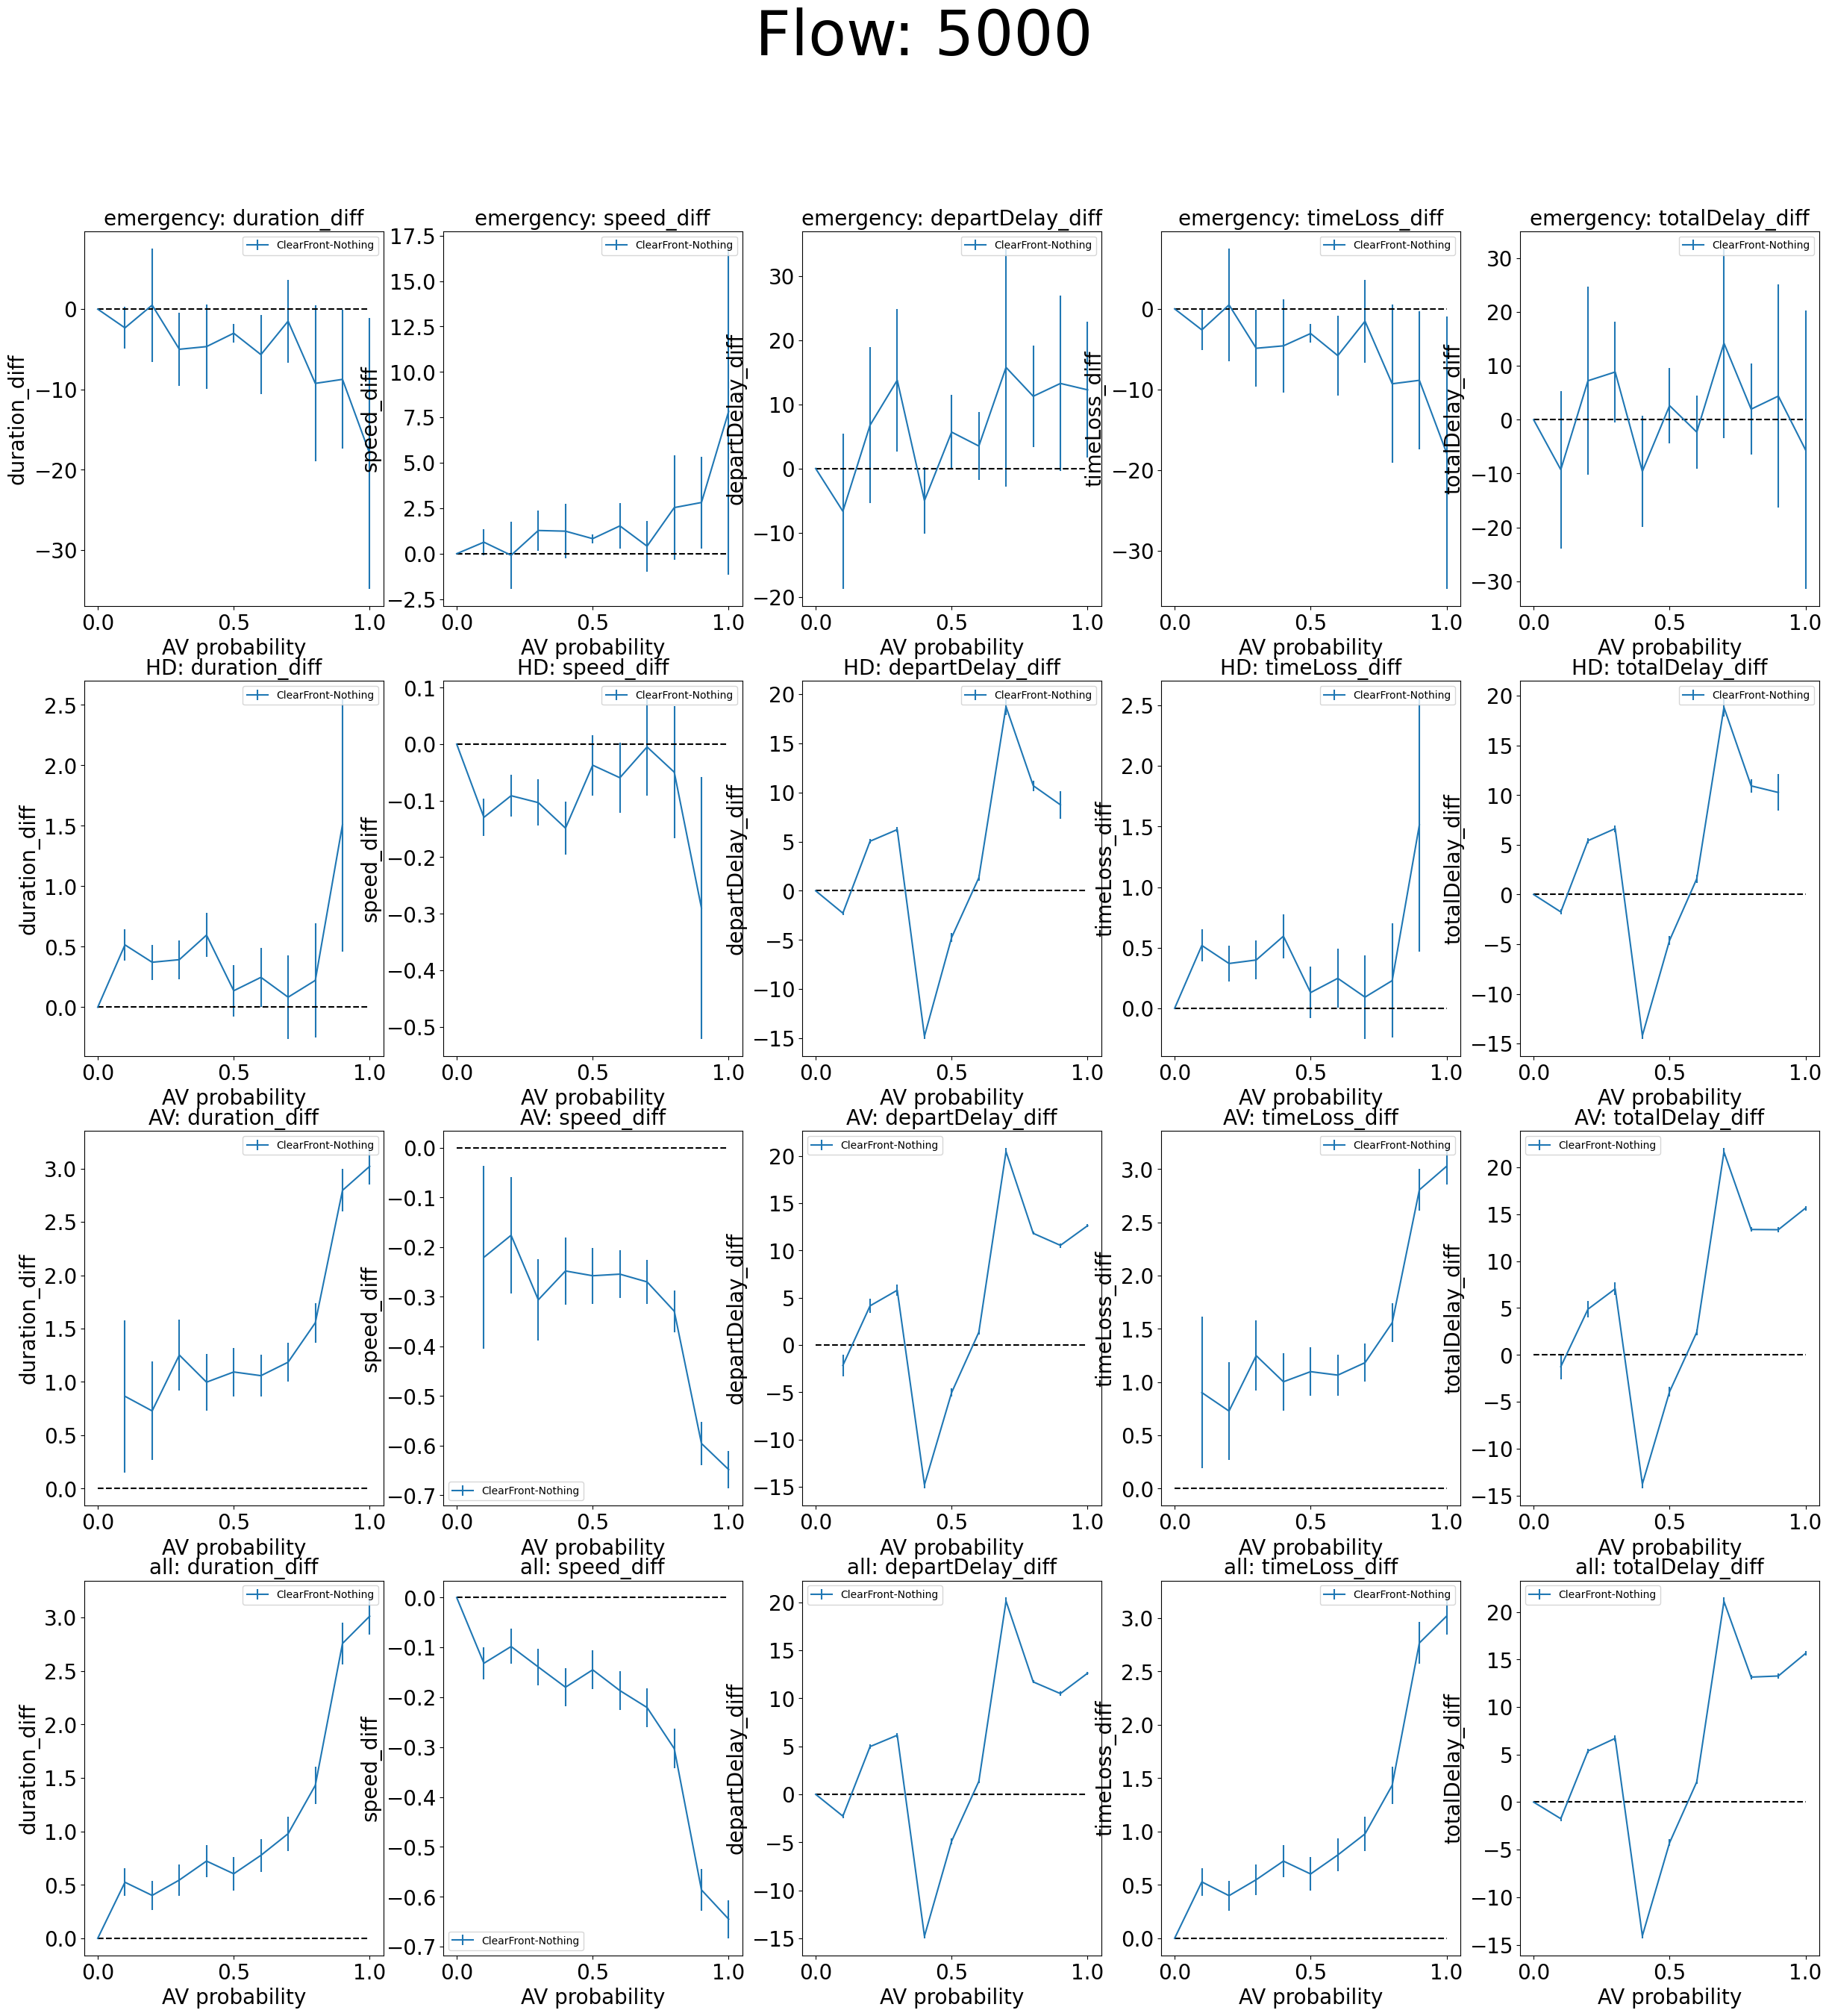

In [12]:
for flow in FLOWS:
    fig, axs = plt.subplots(len(vTypes), len(METRICS), figsize=(30, 30))
    fig.suptitle('Flow: {}'.format(flow), fontsize=fontsize*3)
    for policy in ["ClearFront"]:
        df = pd.read_pickle("results_csvs_server_dur7200/{}_Nothing_flow_{}_long.pkl".format(policy, flow))
        print(policy + ": Num of emergency vehicles: "+ str(df["emergency"]["count"][0]))
        for i, vType in enumerate(vTypes):
            for j, metric in enumerate(METRICS):
                metric += "_diff"
                err = df[vType][f"std_{metric}"]/df[vType]["count"].pow(1/2)*1.96
                axs[i,j].errorbar(df.index, df[vType][f"avg_{metric}"], yerr=err
                                    , label=policy+"-Nothing")
                # Plot zero line
                axs[i,j].plot(df.index, np.zeros(len(df.index)), color="black", linestyle="--")
                axs[i,j].set_title("{}: {}".format(vType, metric), fontsize=fontsize)
                axs[i,j].set_xlabel("AV probability", fontsize=fontsize)
                axs[i,j].set_ylabel(metric, fontsize=fontsize)
                axs[i,j].tick_params(axis='both', which='major', labelsize=fontsize)
                axs[i,j].legend()
    plt.show()